In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#OBJETIVO
El propósito de este NoteBook es realizar un análisis exploratorio de la data que hemos obtenido de diversas fuentes y que posee diversas dimensiones con el fin de poder trabajar comodamente y facilitarnos escoger el modelo de Machine Learning para realizar una predicción


#ESTADÍSTICAS GENERALES METEOROLÓGICAS

In [50]:
file_met = pd.read_excel('/content/drive/MyDrive/Proyecto mejor ruta DS/Datos_Meteorologicos_Historicos_España_2023_2024.xlsx')
df_met = pd.DataFrame(file_met)

In [55]:
df_met.head()

,Localidad,Latitud,Longitud,Mes,Temperatura Máxima (C),Temperatura Mínima (C),Precipitación (mm),Condición del Clima
0,Madrid,40.47681,-3.37641,1,29.3,19.5,0.0,Soleado
1,Madrid,40.47681,-3.37641,2,11.4,7.4,0.0,Parcialmente nublado
2,Madrid,40.47681,-3.37641,3,13.3,10.8,15.2,Lluvia ligera
3,Madrid,40.47681,-3.37641,4,7.1,2.9,0.0,Parcialmente nublado
4,Madrid,40.47681,-3.37641,5,14.1,6.8,0.0,Soleado


In [ ]:
df_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Localidad               420 non-null    object 
 1   Latitud                 420 non-null    float64
 2   Longitud                420 non-null    float64
 3   Mes                     420 non-null    int64  
 4   Temperatura Máxima (C)  420 non-null    float64
 5   Temperatura Mínima (C)  420 non-null    float64
 6   Precipitación (mm)      420 non-null    float64
 7   Condición del Clima     420 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 26.4+ KB


##Disponibilidad de los datos

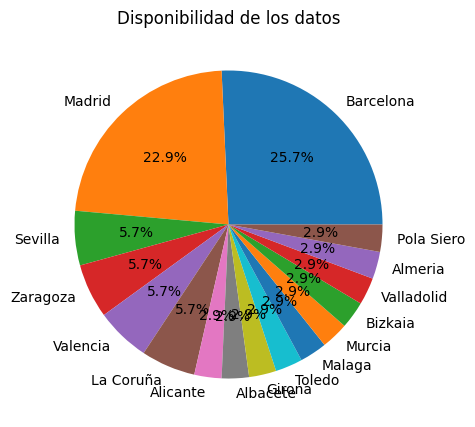

In [ ]:
metdis = df_met['Localidad'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(metdis, labels=metdis.index, autopct='%1.1f%%')
plt.title('Disponibilidad de los datos')
plt.show()

##Temperatura promedio, máxima y mínima

In [ ]:
df_met['Temperatura promedio'] = (df_met['Temperatura Máxima (C)'] + df_met['Temperatura Mínima (C)']) / 2

In [ ]:
localidades = df_met['Localidad'].unique()

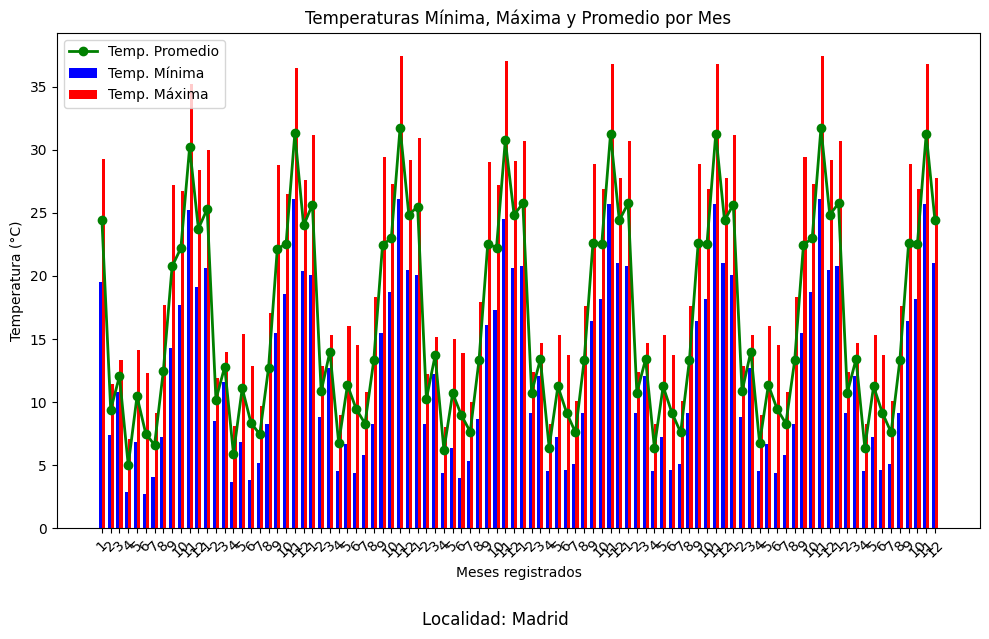

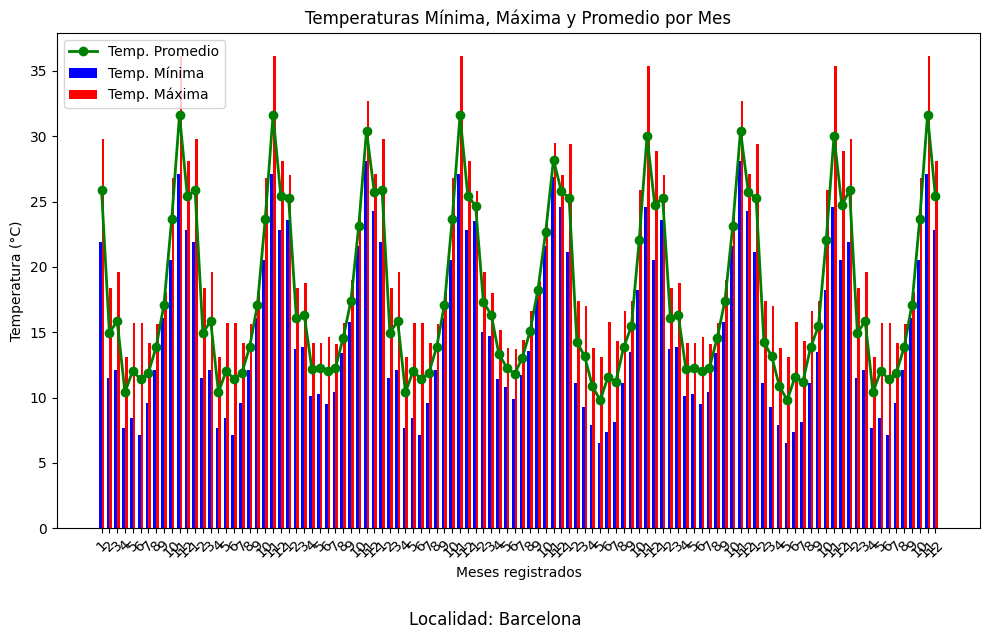

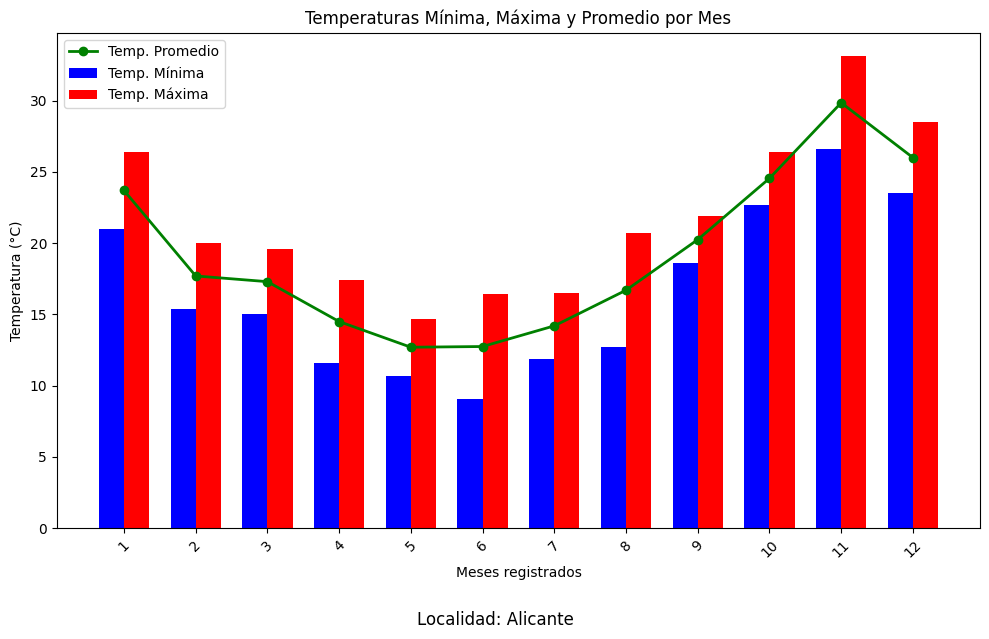

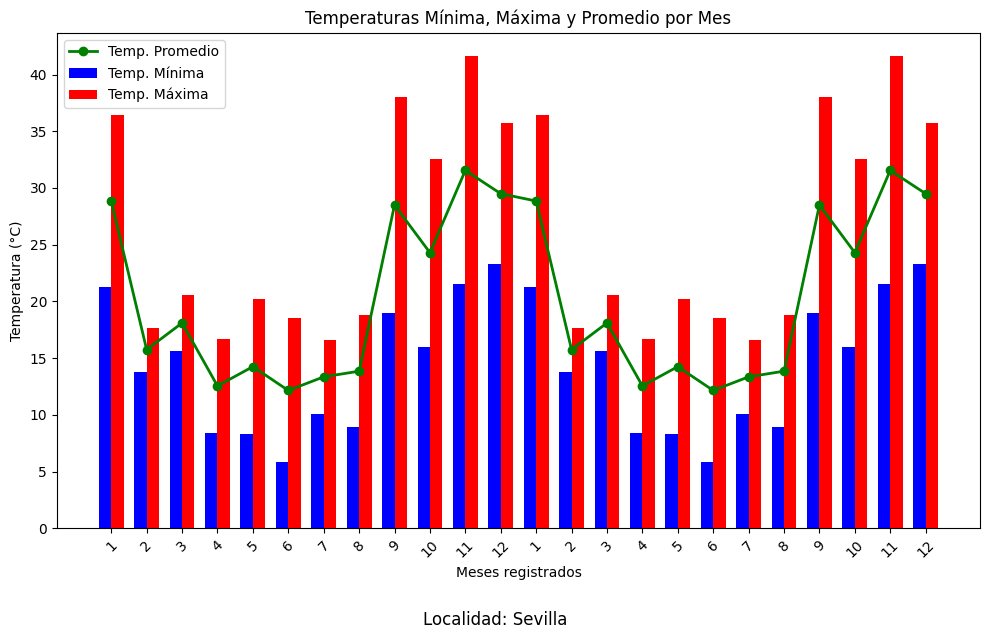

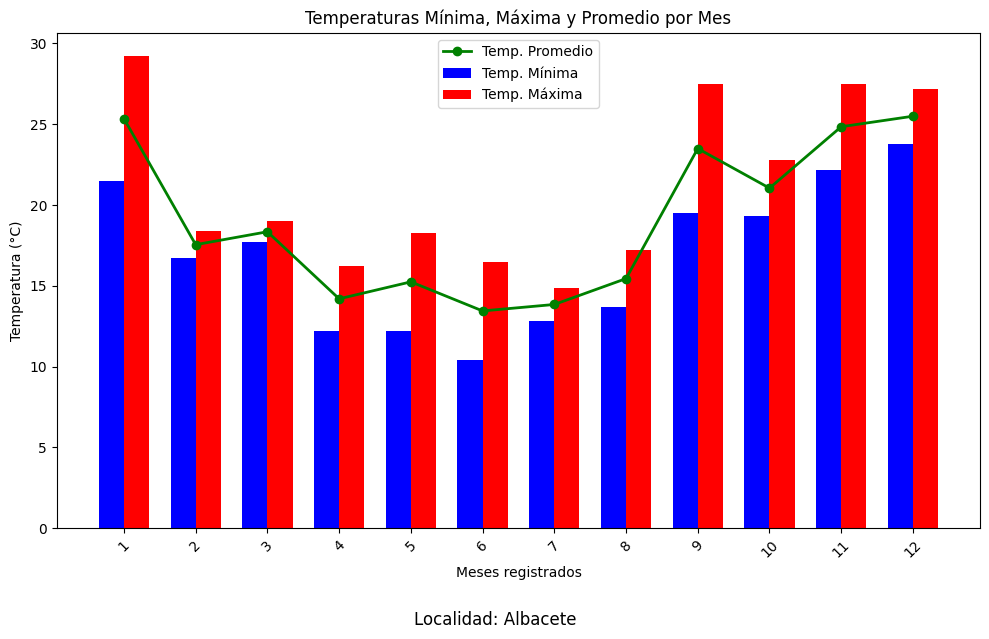

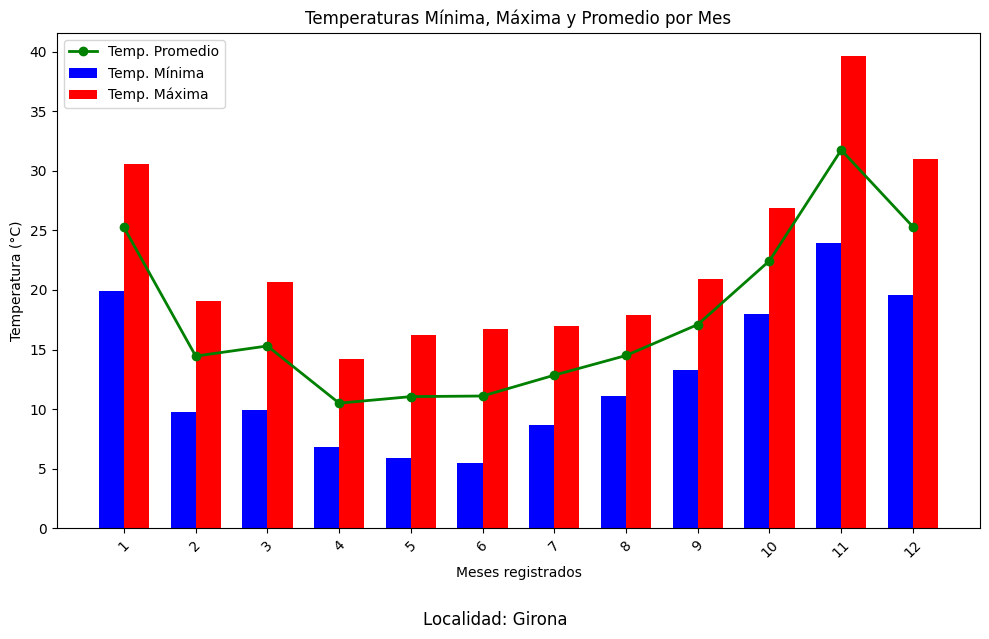

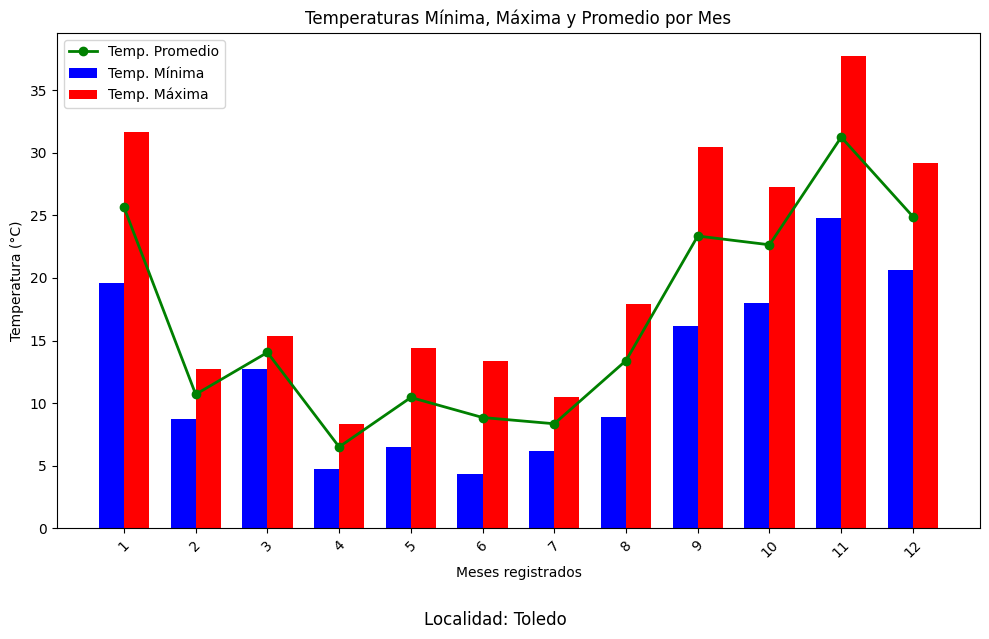

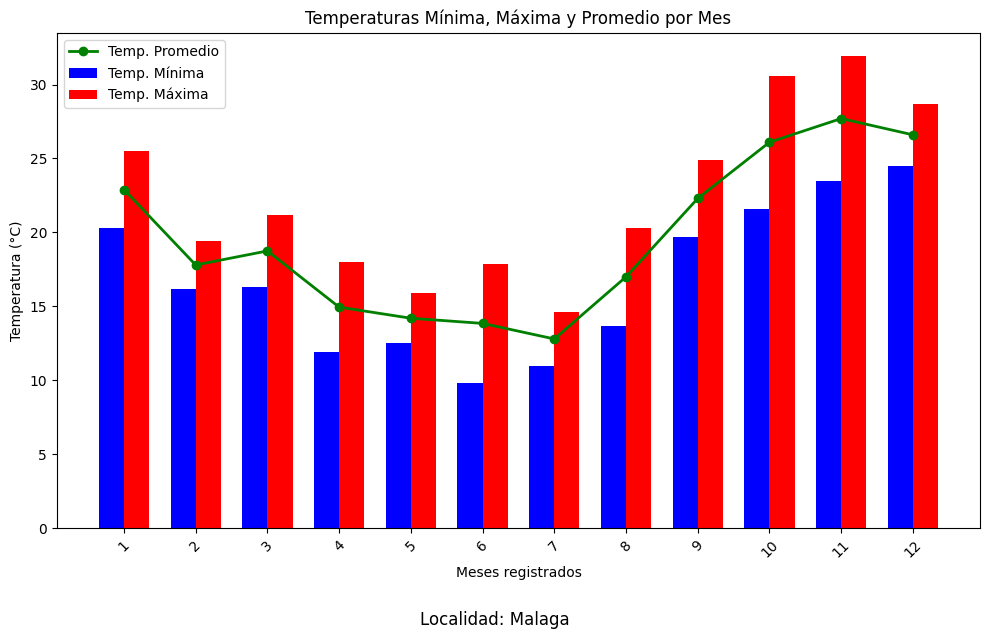

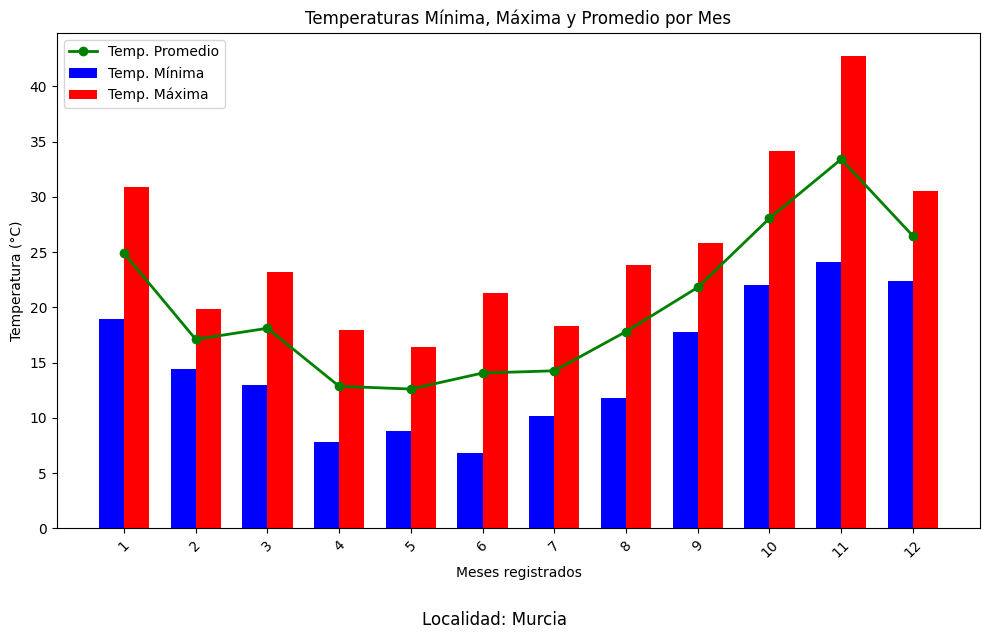

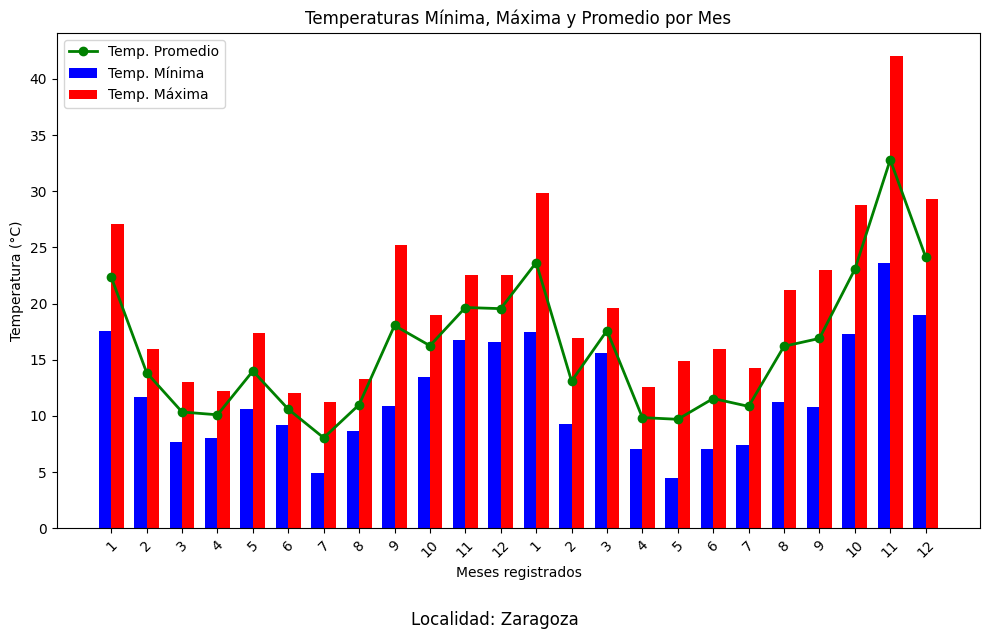

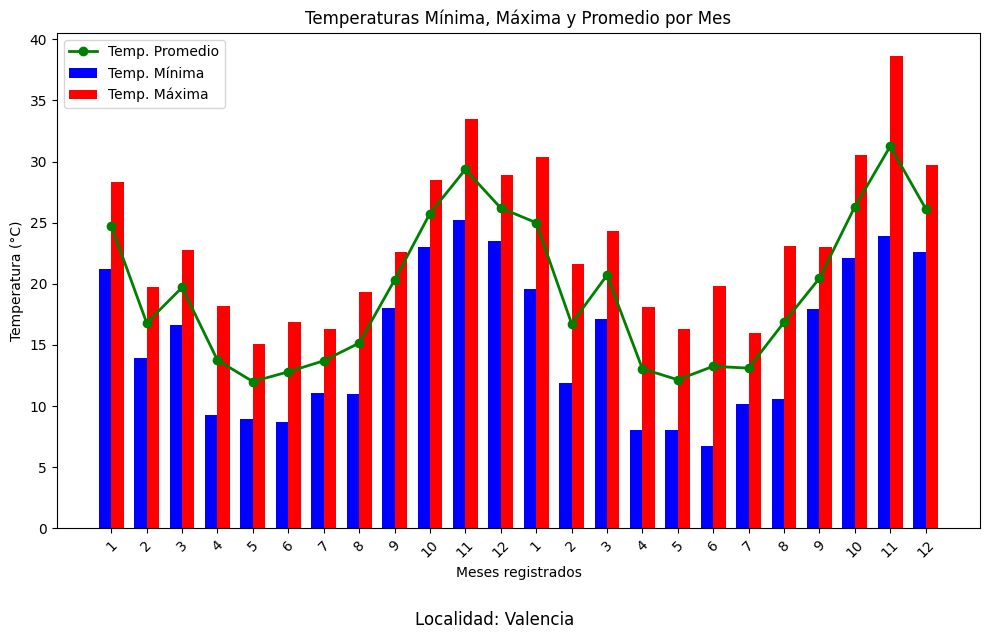

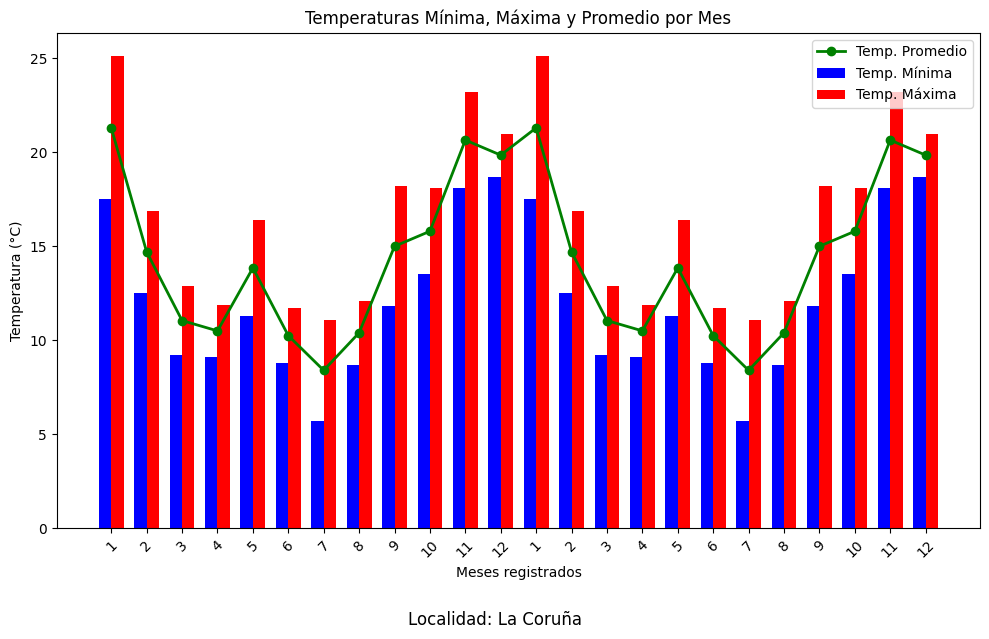

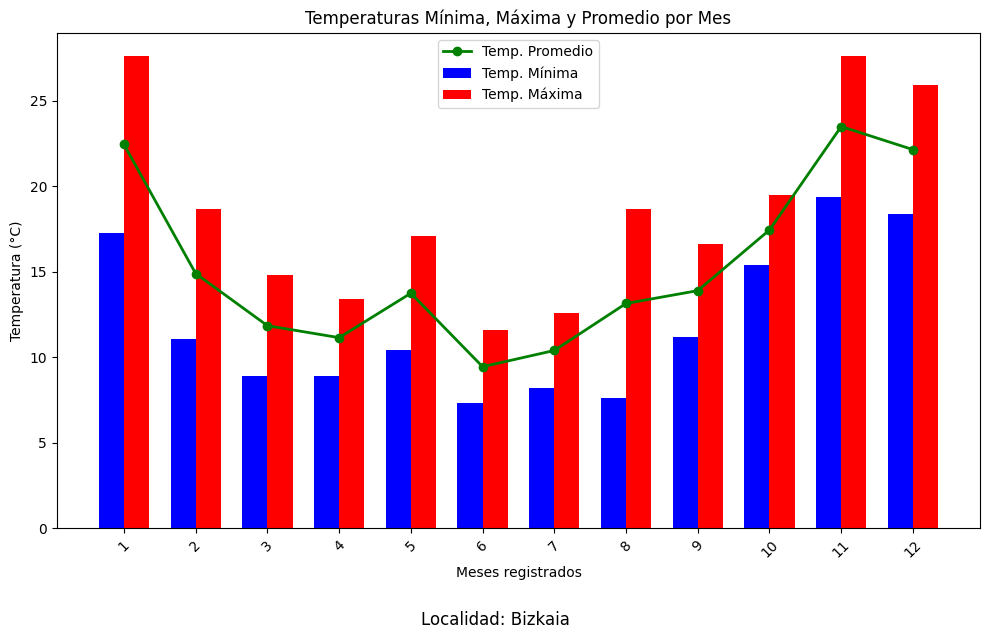

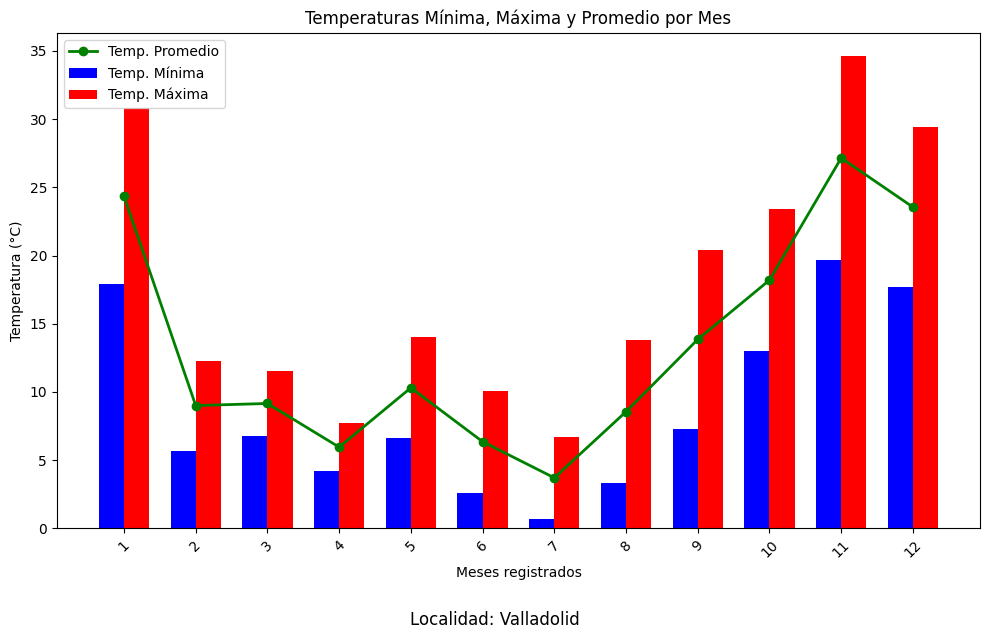

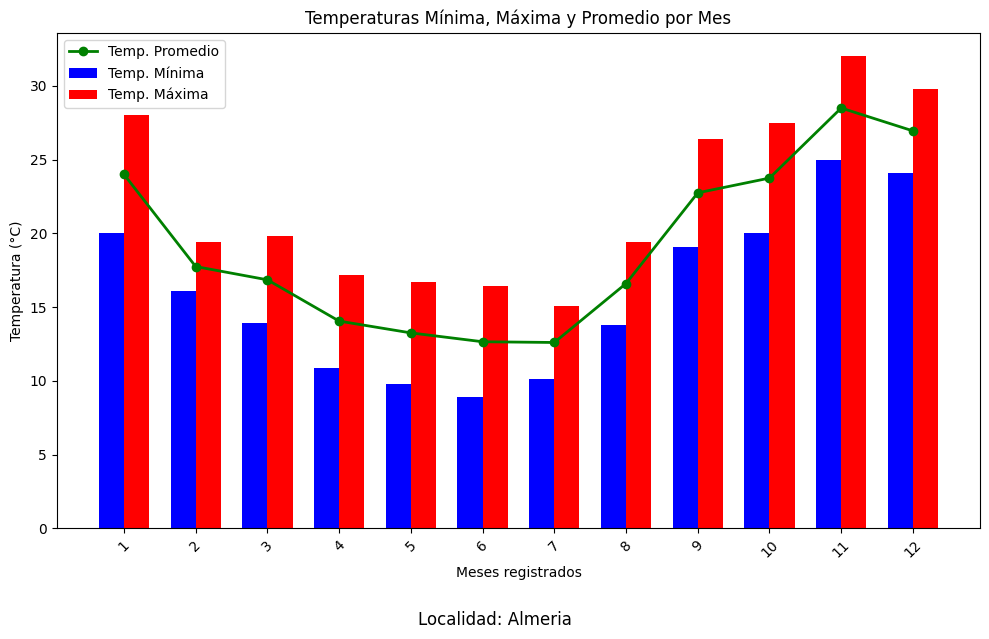

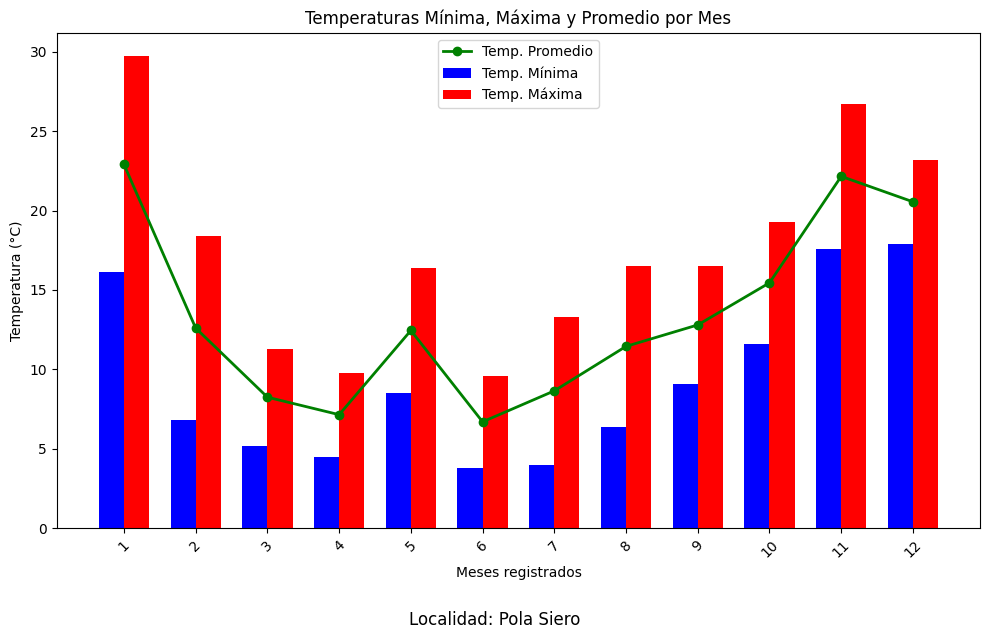

In [ ]:
for localidad in localidades:
    df_localidad = df_met[df_met['Localidad'] == localidad]

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.arange(len(df_localidad['Mes']))
    width = 0.35

    ax.bar(x - width/2, df_localidad['Temperatura Mínima (C)'], width, label='Temp. Mínima', color='blue')
    ax.bar(x + width/2, df_localidad['Temperatura Máxima (C)'], width, label='Temp. Máxima', color='red')

    ax.plot(x, df_localidad['Temperatura promedio'], color='green', label='Temp. Promedio', marker='o', linestyle='-', linewidth=2)

    ax.set_xlabel('Meses registrados')
    ax.set_ylabel('Temperatura (°C)')
    ax.set_title('Temperaturas Mínima, Máxima y Promedio por Mes')
    ax.set_xticks(x)
    ax.set_xticklabels(df_localidad['Mes'])
    ax.legend()
    fig.text(0.5, -0.05, f'Localidad: {localidad}', ha='center', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Precipitación y condición climática

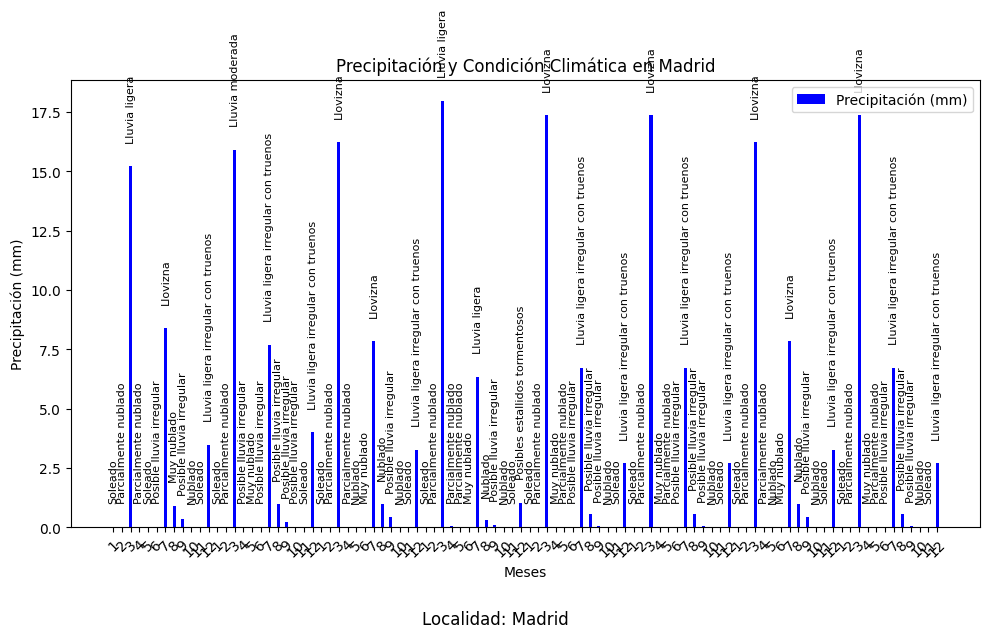

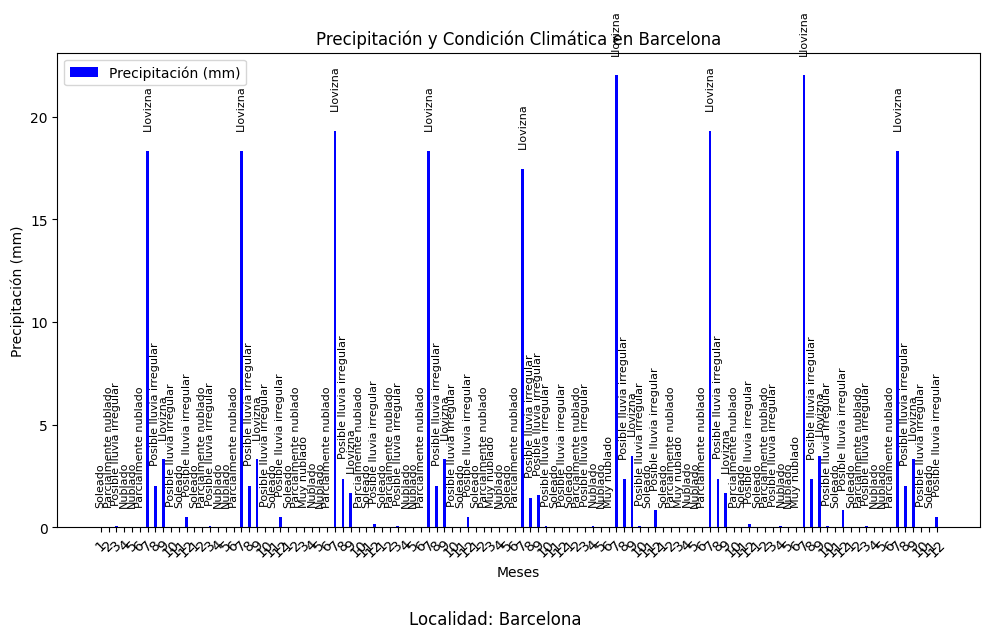

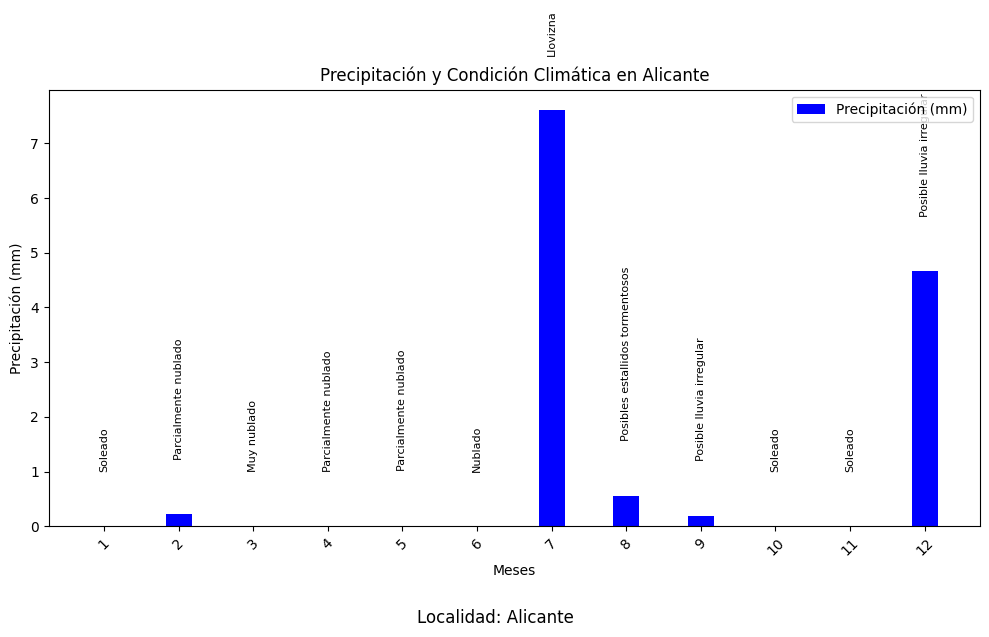

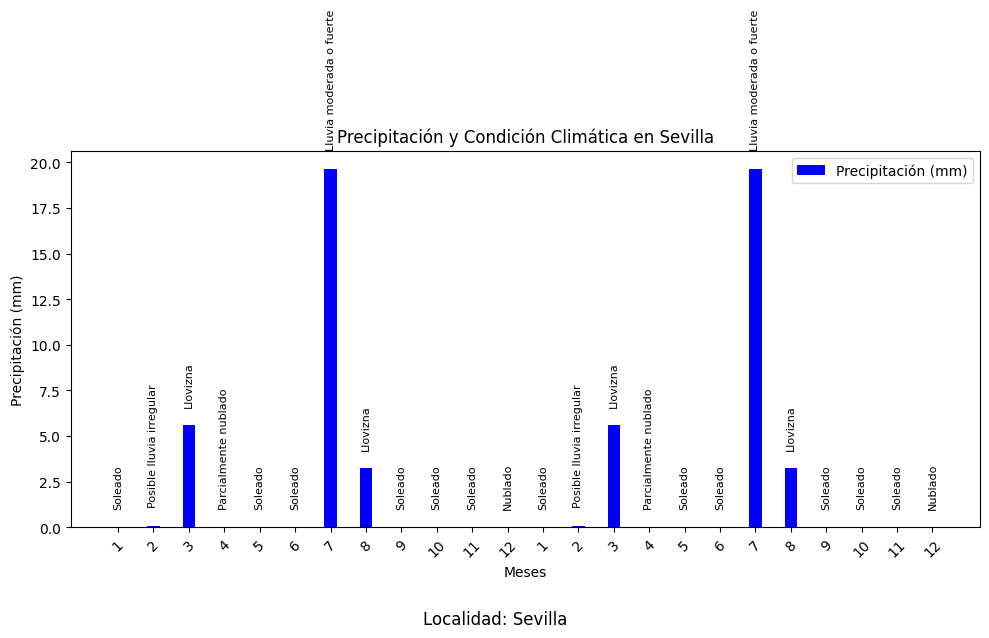

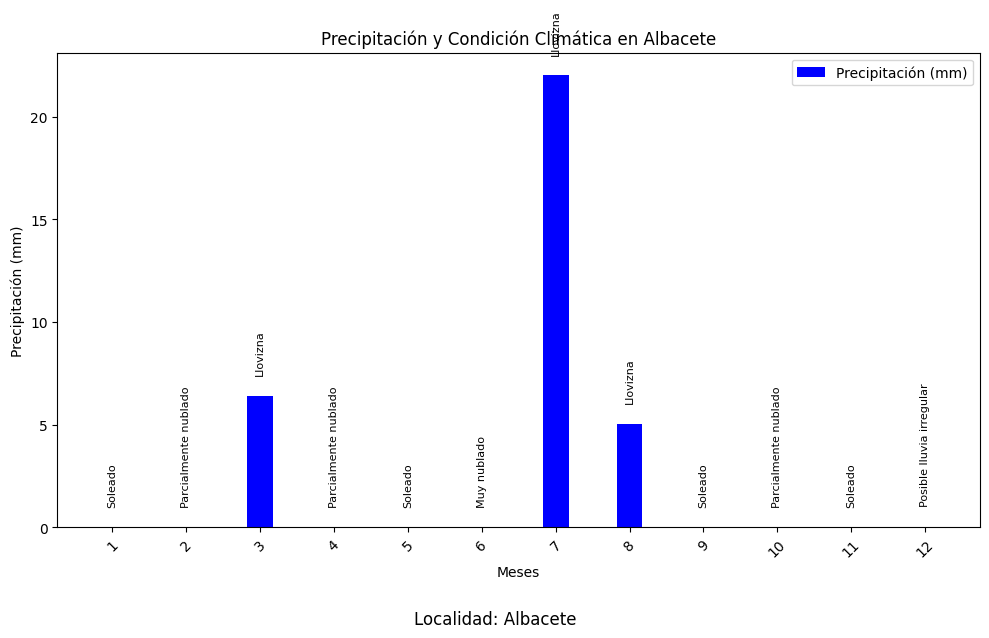

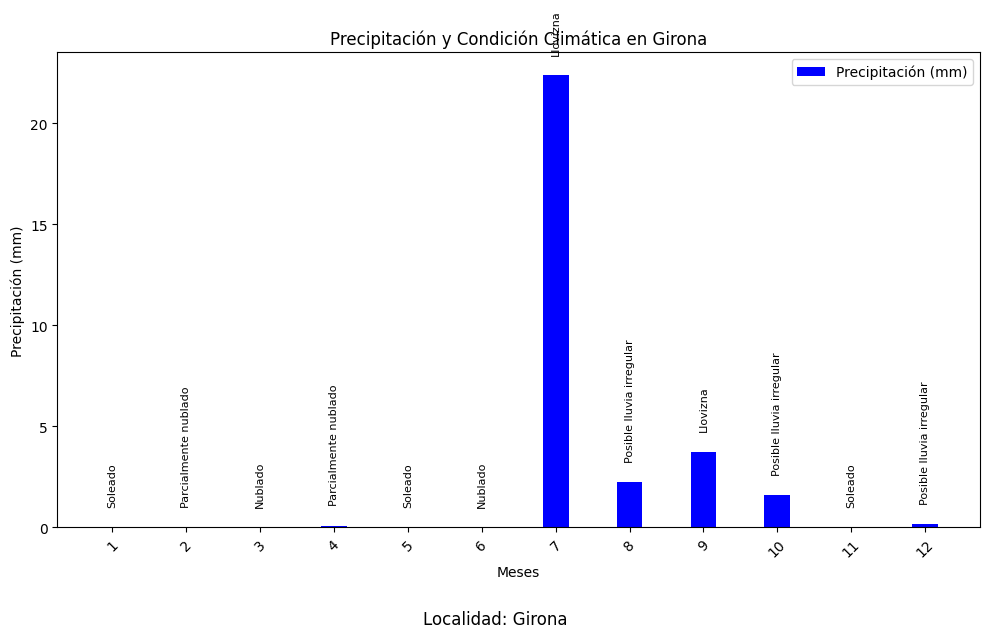

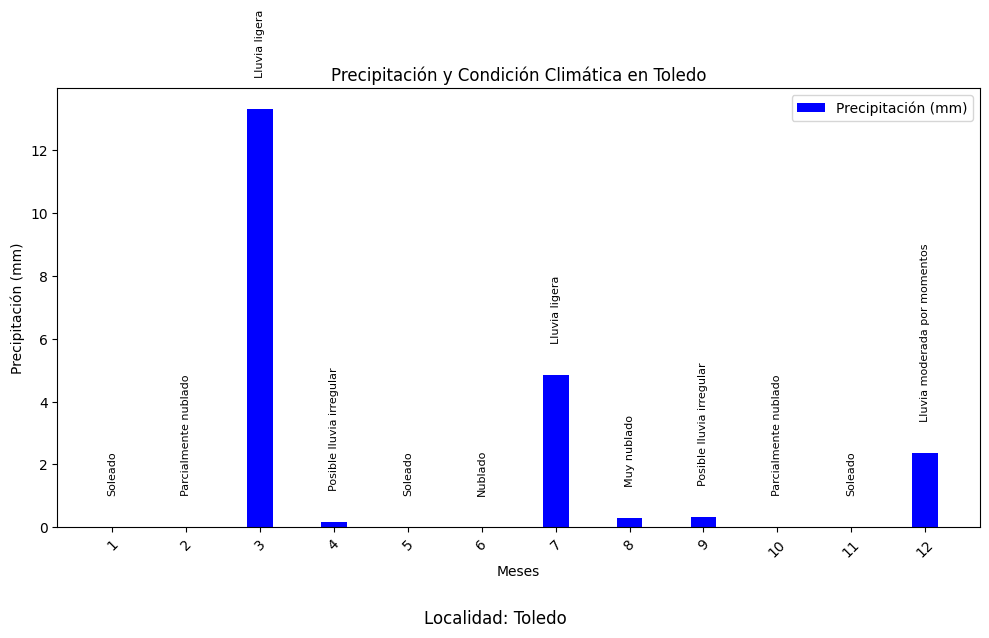

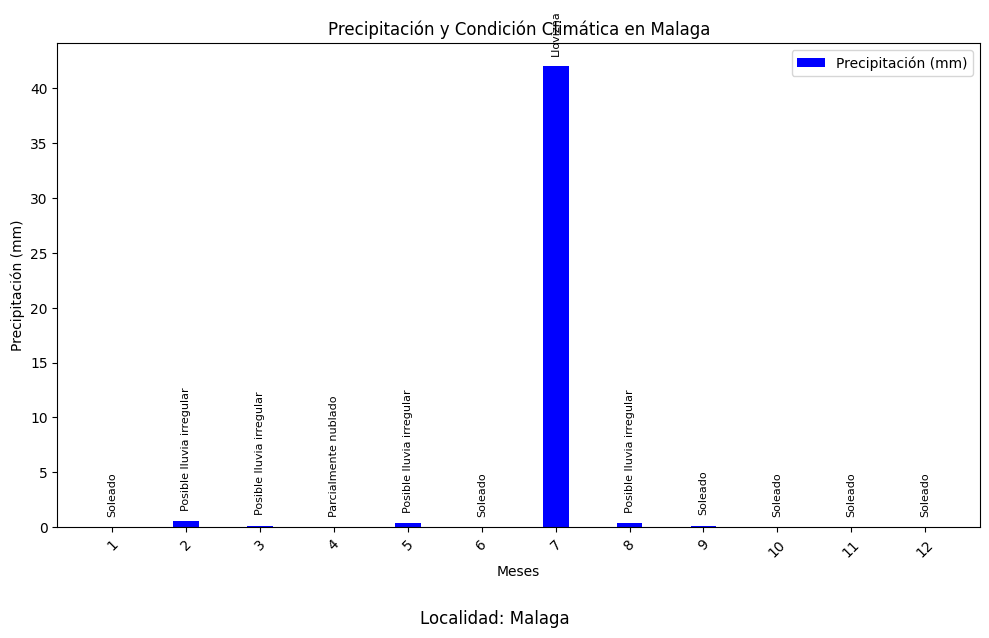

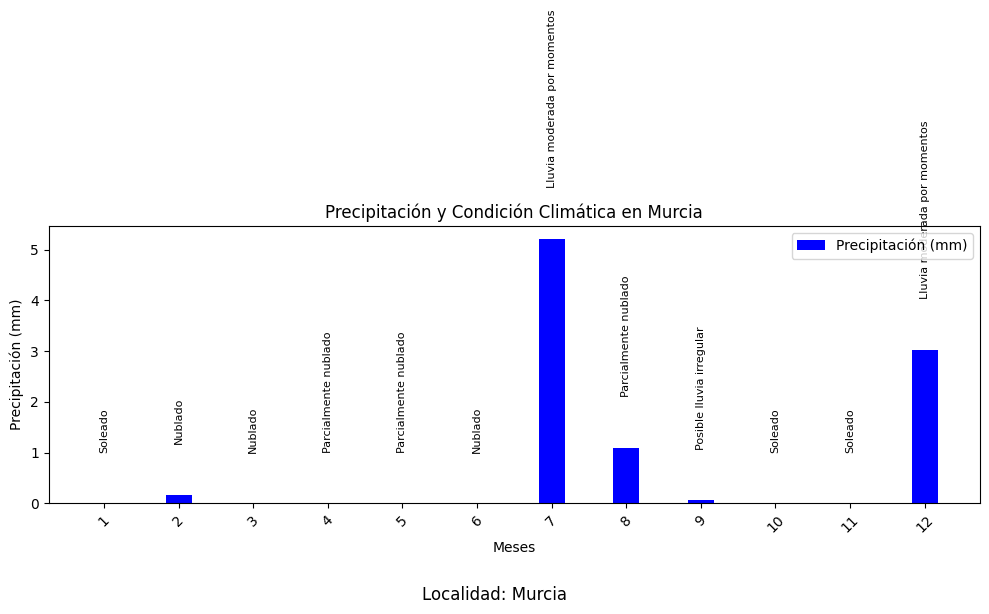

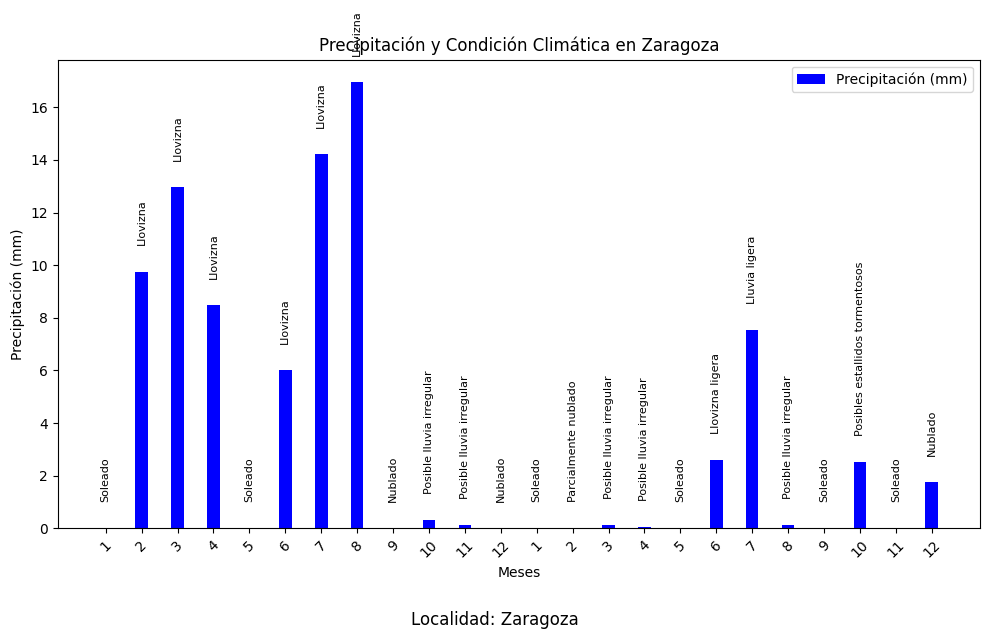

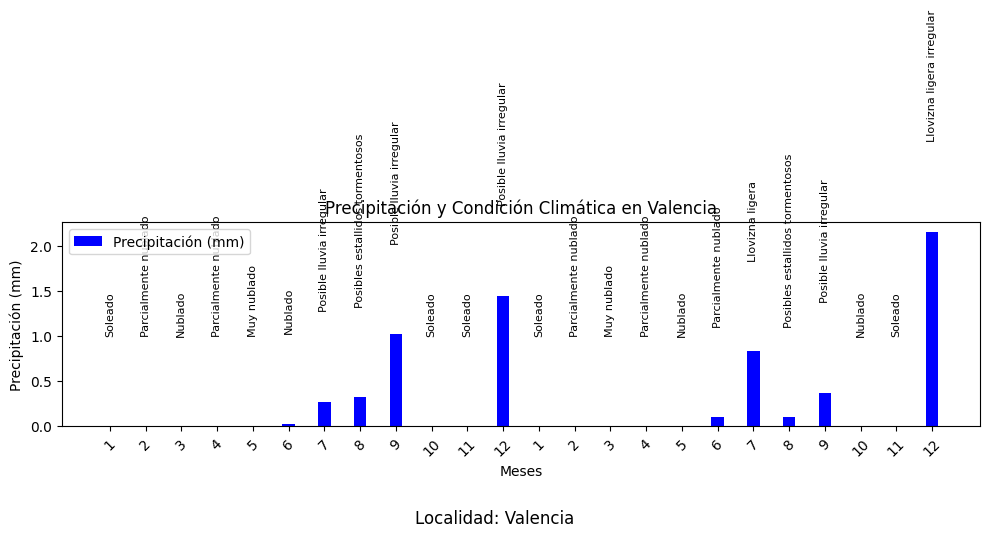

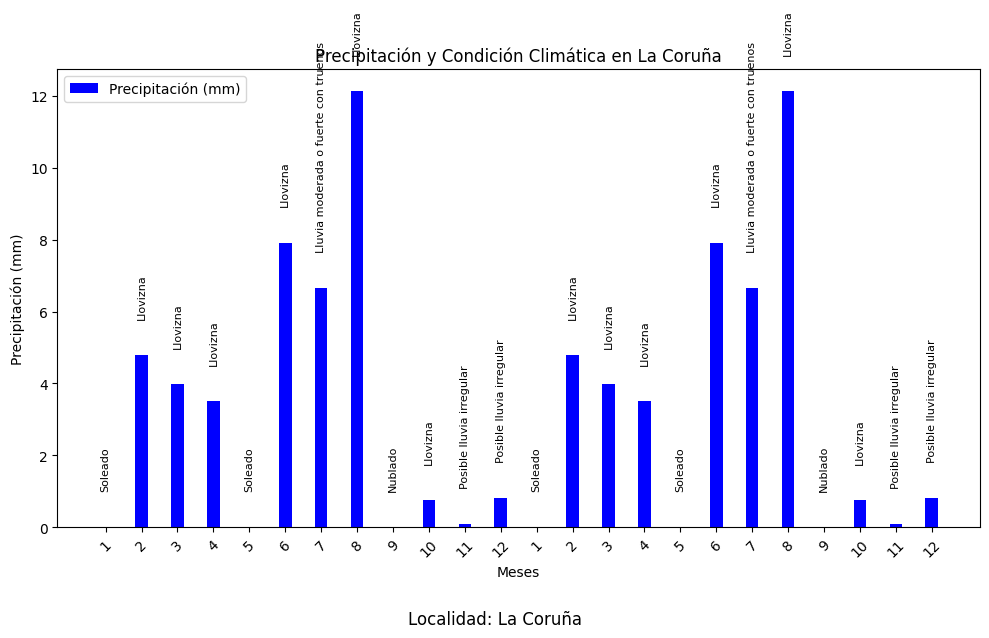

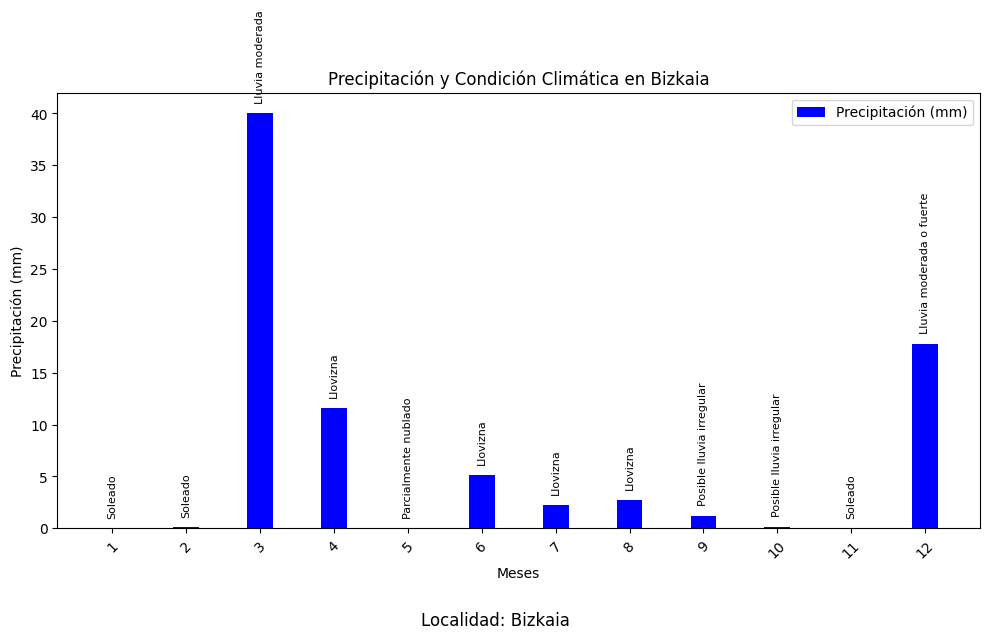

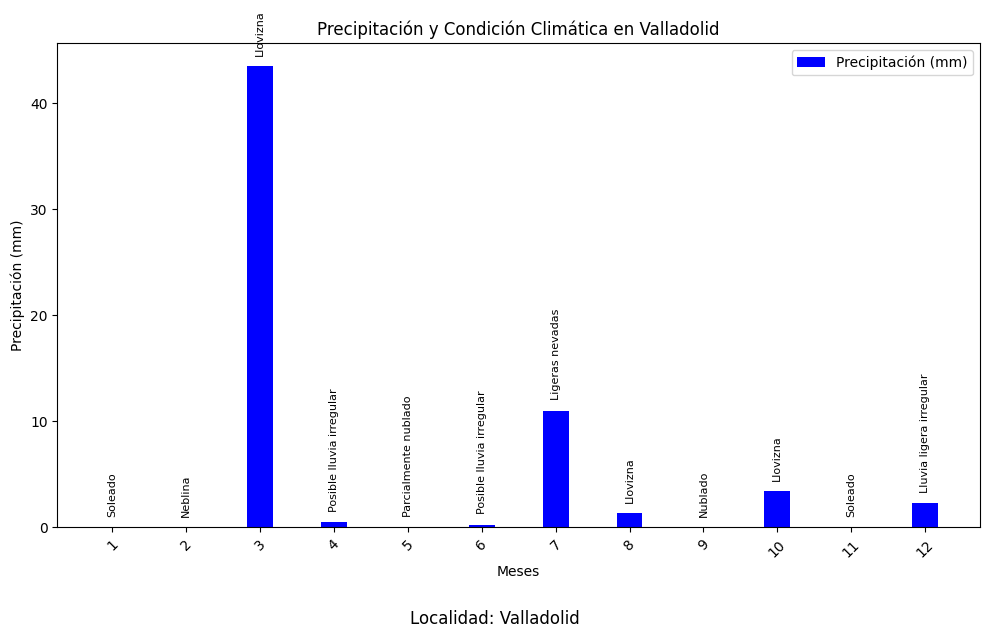

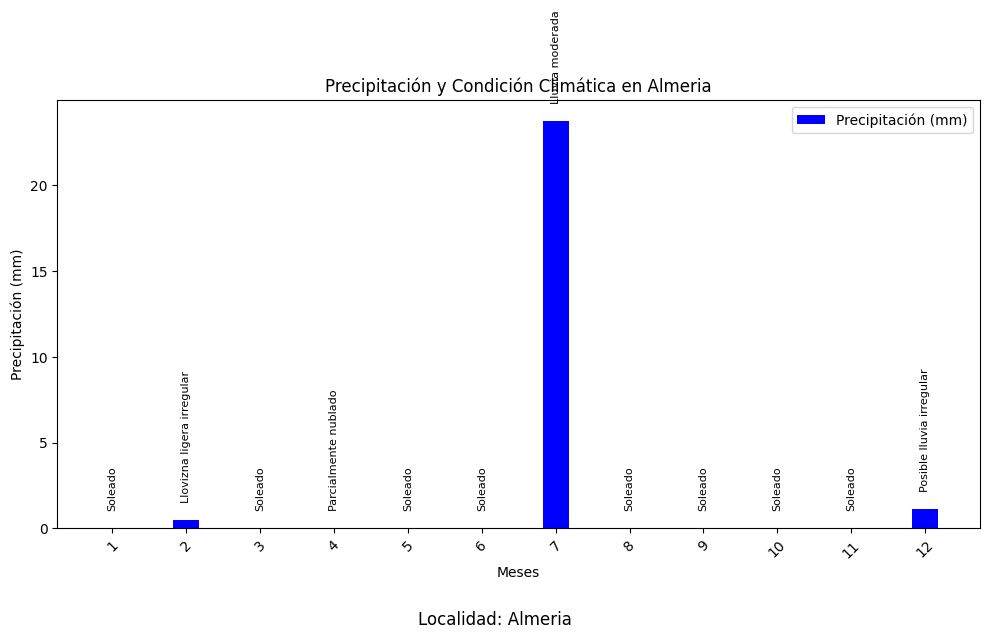

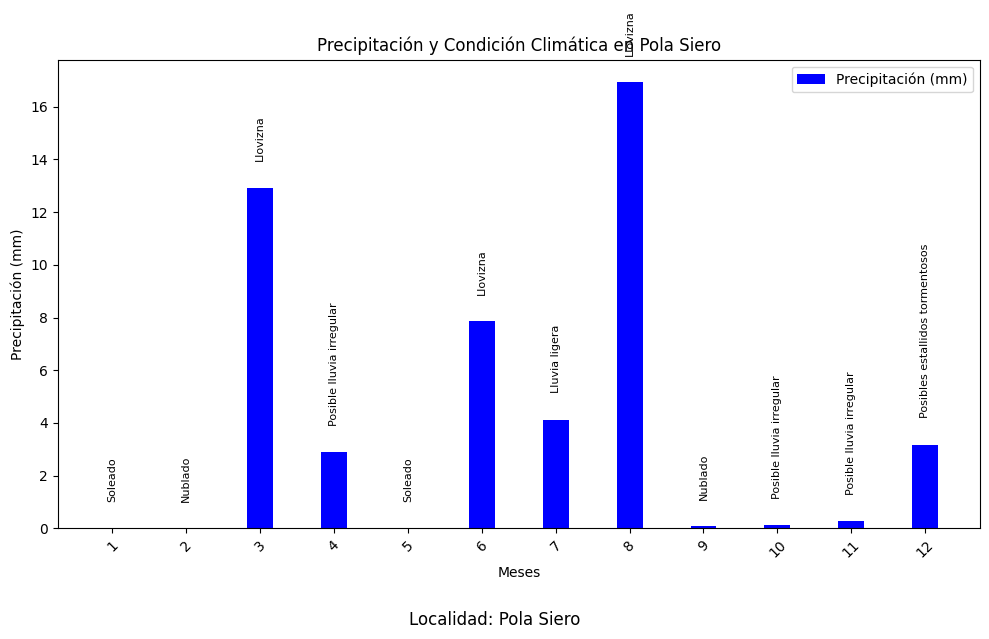

In [ ]:
for localidad in localidades:
    df_localidad = df_met[df_met['Localidad'] == localidad]

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.arange(len(df_localidad['Mes']))
    width = 0.35

    ax.bar(x, df_localidad['Precipitación (mm)'], width, label='Precipitación (mm)', color='blue')
    for i, condicion in enumerate(df_localidad['Condición del Clima']):
        ax.text(i, df_localidad['Precipitación (mm)'].iloc[i] + 1, condicion, ha='center', va='bottom', rotation=90, fontsize=8)

    ax.set_xlabel('Meses')
    ax.set_ylabel('Precipitación (mm)')
    ax.set_title(f'Precipitación y Condición Climática en {localidad}')
    ax.set_xticks(x)
    ax.set_xticklabels(df_localidad['Mes'])

    ax.legend()
    fig.text(0.5, -0.05, f'Localidad: {localidad}', ha='center', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#ACCIDENTES DE TRÁFICO


*   fev: fallecidos en vía
*   acp: accidentes por provincia
*   tads: Tabla de accidentes por días de la semana y condiciones varias




In [ ]:
file_fev = pd.read_csv('/content/drive/MyDrive/Proyecto mejor ruta DS/Accidentes de tráfico/muertos_en_accidentes_de_trafico_en_los_ultimos_10_años.csv', sep=';', nrows=121)
df_fev = pd.DataFrame(file_fev) #A partir de la fila 121 es información de contacto de la DGT

In [ ]:
df_fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                120 non-null    float64
 1   Periodo            120 non-null    object 
 2   Víctimas mortales  120 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [ ]:
promedio_por_año_fallecidos = df_fev.groupby('Año')['Víctimas mortales'].mean()

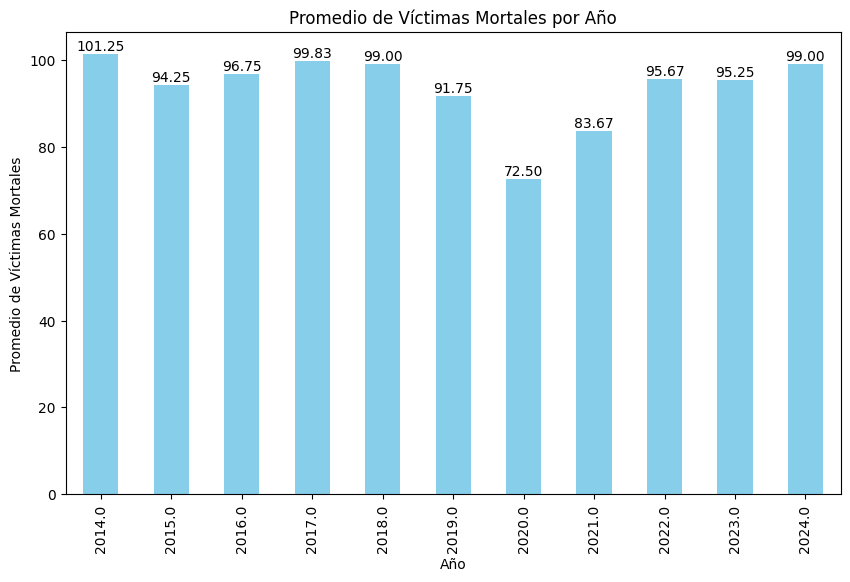

In [ ]:
plt.figure(figsize=(10, 6))
promedio_por_año_fallecidos.plot(kind='bar', color='skyblue')

plt.xlabel('Año')
plt.ylabel('Promedio de Víctimas Mortales')
plt.title('Promedio de Víctimas Mortales por Año')
for i, value in enumerate(promedio_por_año_fallecidos):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
plt.show()

In [76]:
file_acp = pd.read_csv('/content/drive/MyDrive/Proyecto mejor ruta DS/Accidentes de tráfico/Accidentes_(2011-2022 para promedio)_victimas_Carr__CCAA_provincia.csv')
df_acp = pd.DataFrame(file_acp)

In [ ]:
df_acp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   comunidad  2496 non-null   object 
 1   provincia  2496 non-null   object 
 2   year       2496 non-null   int64  
 3   Tipo       2496 non-null   object 
 4   numero     2496 non-null   float64
 5   Textbox6   2496 non-null   object 
 6   Textbox7   2496 non-null   float64
 7   numero1    2496 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 156.1+ KB


In [ ]:
df_acp.describe(include='object')

,comunidad,provincia,Tipo,Textbox6
count,2496,2496,2496,2496
unique,19,52,4,19
top,Castilla y León,Almería,Nº de accidentes con víctimas,Subtotal Castilla y León
freq,432,48,624,432


In [ ]:
df_acp['Tipo'].unique()

array(['Nº de accidentes con víctimas', 'Víctimas mortales',
       'Heridos hospitalizados', 'Total víctimas'], dtype=object)

In [ ]:
df_acpg = df_acp.groupby(['Tipo', 'year'])['numero'].sum().reset_index()
tipos_ac = df_acp['Tipo'].unique()

In [ ]:
plt.figure(figsize=(10, 6))

array(['Nº de accidentes con víctimas', 'Víctimas mortales',
       'Heridos hospitalizados', 'Total víctimas'], dtype=object)

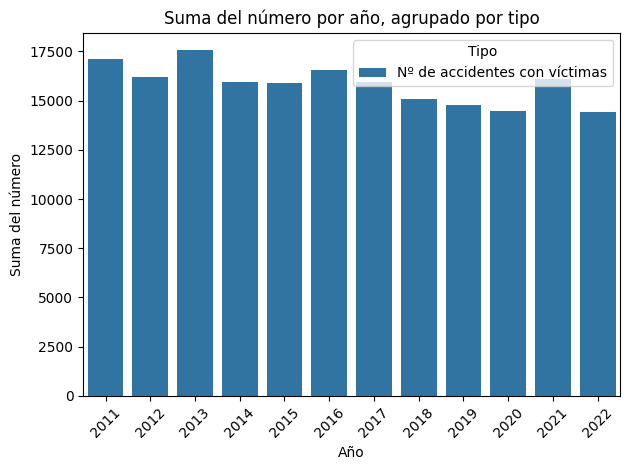

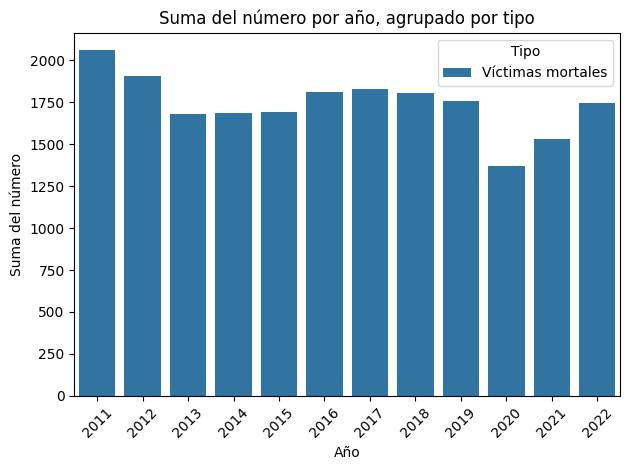

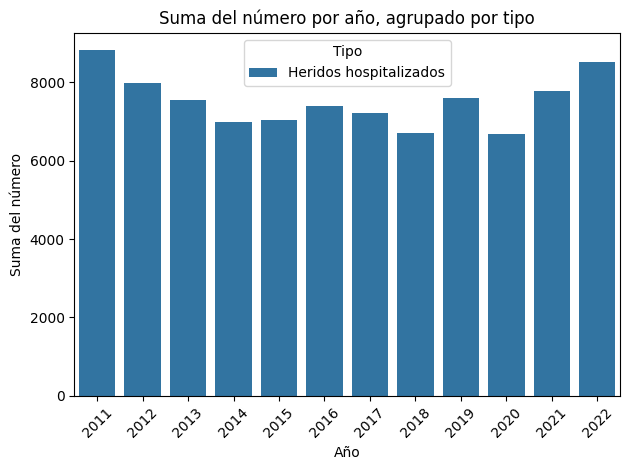

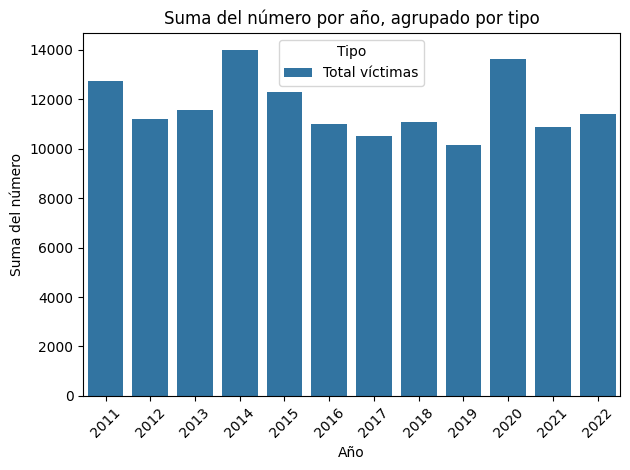

In [ ]:
for tipo in tipos_ac:
  df_tipo = df_acpg[df_acpg['Tipo'] == tipo]
  sns.barplot(x='year', y='numero', data=df_tipo, label=tipo)
  plt.title('Suma del número por año, agrupado por tipo')
  plt.xlabel('Año')
  plt.ylabel('Suma del número')
  plt.legend(title="Tipo")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
df_acpg = df_acp.groupby(['provincia', 'year'])['numero'].sum().reset_index()
df_avg = df_acpg.groupby('provincia')['numero'].mean().reset_index()
df_avg.rename(columns={'numero': 'promedio_numero'}, inplace=True)

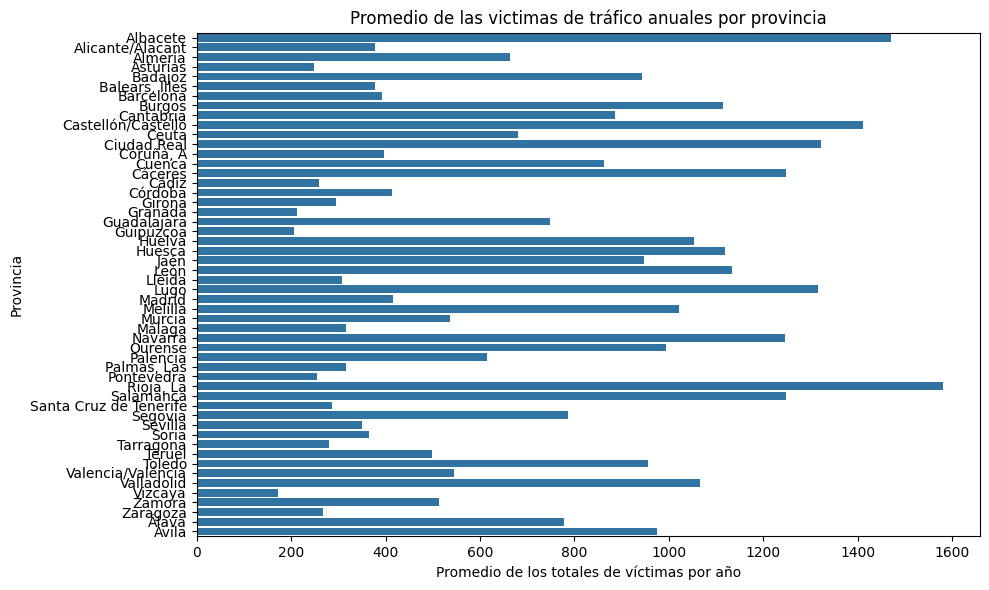

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='provincia', x='promedio_numero', data=df_avg, orient='h')
plt.title('Promedio de las víctimas de tráfico anuales por provincia')
plt.xlabel('Promedio de los totales de víctimas por año')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()

In [ ]:
file_tads = pd.read_excel('/content/drive/MyDrive/Proyecto mejor ruta DS/Accidentes de tráfico/TABLA_ACCIDENTES_22.xlsx')
df_tads = pd.DataFrame(file_tads)

In [ ]:
df_tads.head(5)

,ID_ACCIDENTE,AÑO,MES,DIA_SEMANA,HORA,COD_PROVINCIA,COD_MUNICIPIO,ISLA,ZONA,ZONA_AGRUPADA,...,PRIORI_OTRA,CONDICION_NIVEL_CIRCULA,CONDICION_FIRME,CONDICION_ILUMINACION,CONDICION_METEO,CONDICION_NIEBLA,CONDICION_VIENTO,VISIB_RESTRINGIDA_POR,ACERA,TRAZADO_PLANTA
0,1,2022,1,6,3,1,0,NaN,1,1,...,999,1,1,6,1,NaN,NaN,1,998,3
1,2,2022,1,5,16,1,1059,NaN,1,1,...,999,1,3,1,3,NaN,NaN,1,998,2
2,3,2022,1,6,21,1,0,NaN,1,1,...,0,1,1,6,2,NaN,NaN,1,998,2
3,4,2022,1,7,12,1,0,NaN,1,1,...,999,1,3,1,3,NaN,NaN,1,998,1
4,5,2022,1,7,12,1,0,NaN,1,1,...,999,1,1,1,1,NaN,NaN,1,998,3


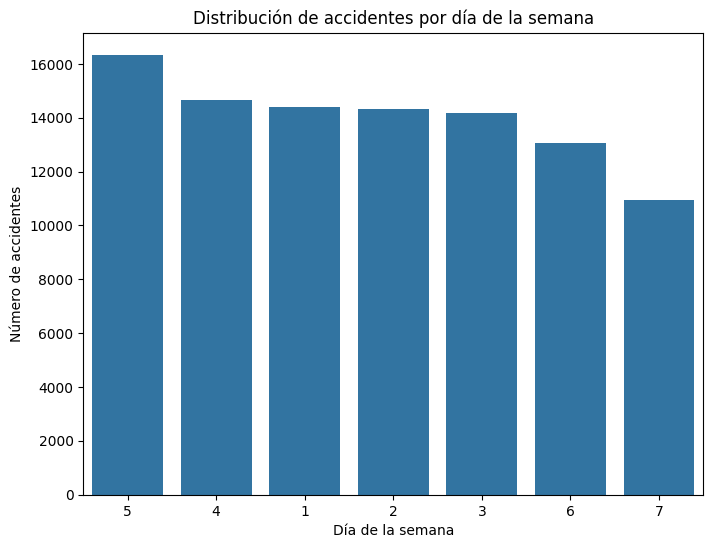

In [ ]:
# Distribución de accidentes por día de la semana
plt.figure(figsize=(8, 6))
sns.countplot(x='DIA_SEMANA', data=df_tads, order=df_tads['DIA_SEMANA'].value_counts().index)
plt.title('Distribución de accidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accidentes')
plt.show()
# 1: Lunes, 2: Martes, 3: Miércoles, 4: Jueves, 5: Viernes, 6: Sábado, 7: Domingo

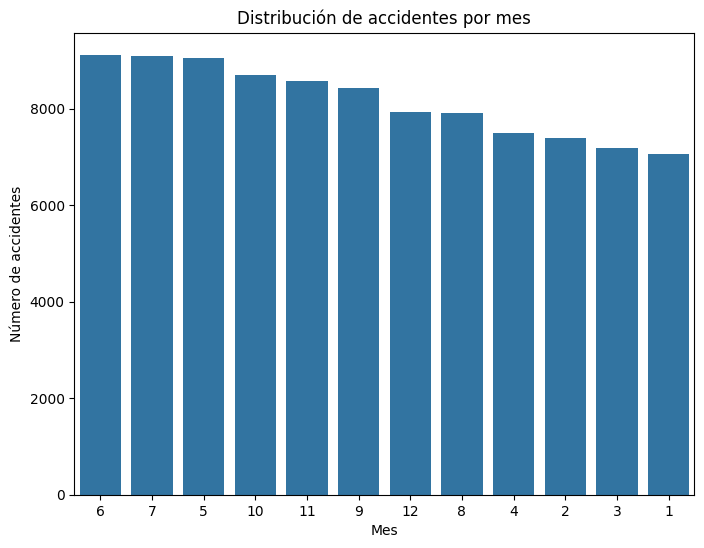

In [ ]:
# Distribución de accidentes por mes
plt.figure(figsize=(8, 6))
sns.countplot(x='MES', data=df_tads, order=df_tads['MES'].value_counts().index)
plt.title('Distribución de accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.show()
# 1: Enero, 2: Febrero, 3: Marzo, 4: Abril, 5: Mayo, 6: Junio, 7: Julio, 8: Agosto...

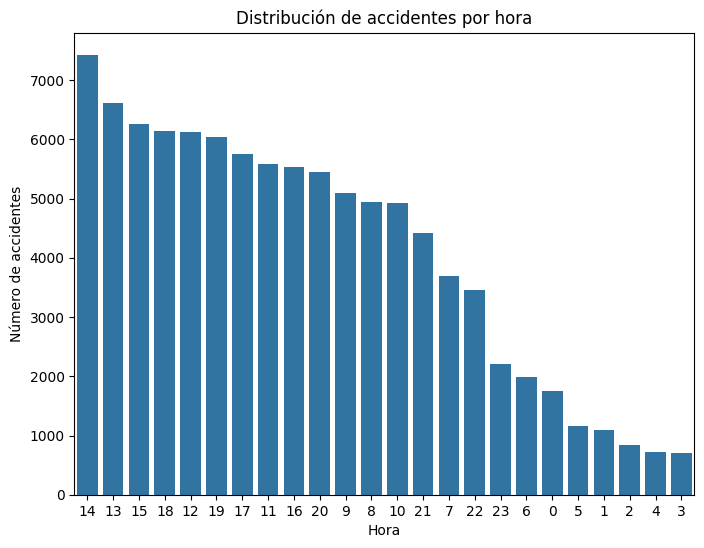

In [ ]:
# Distribución de accidentes por hora
plt.figure(figsize=(8, 6))
sns.countplot(x='HORA', data=df_tads, order=df_tads['HORA'].value_counts().index)
plt.title('Distribución de accidentes por hora')
plt.xlabel('Hora')
plt.ylabel('Número de accidentes')
plt.show()

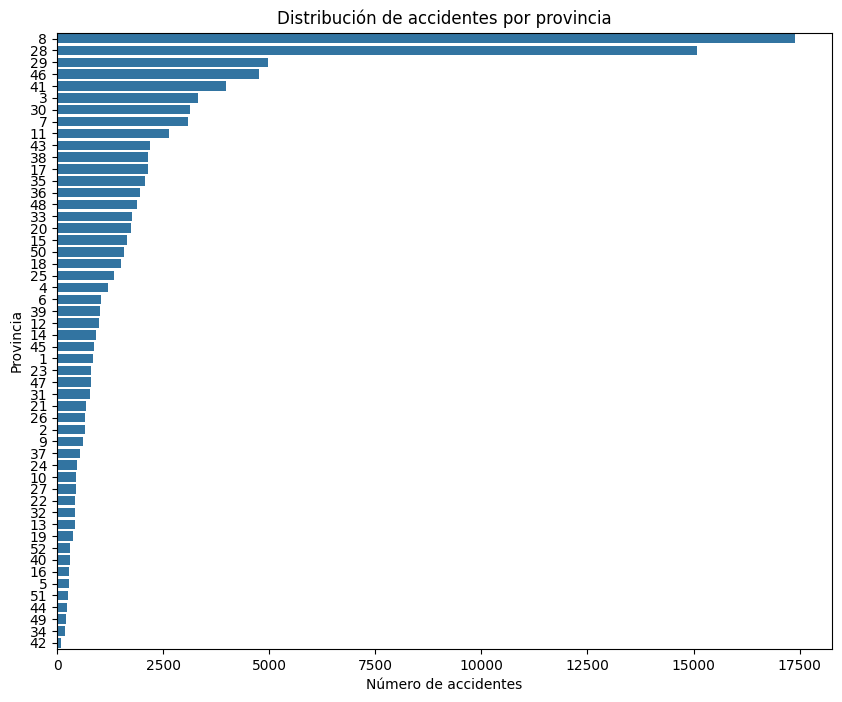

In [ ]:
# Distribución de accidentes por provincia
plt.figure(figsize=(10, 8))
sns.countplot(y='COD_PROVINCIA', data=df_tads, order=df_tads['COD_PROVINCIA'].value_counts().index)
plt.title('Distribución de accidentes por provincia')
plt.xlabel('Número de accidentes')
plt.ylabel('Provincia')
plt.show()
#8: BARCELONA, 28: MADRID (LAS QUE MAS ACCIDENTES) ... 42: SORIA (LA QUE MENOS)

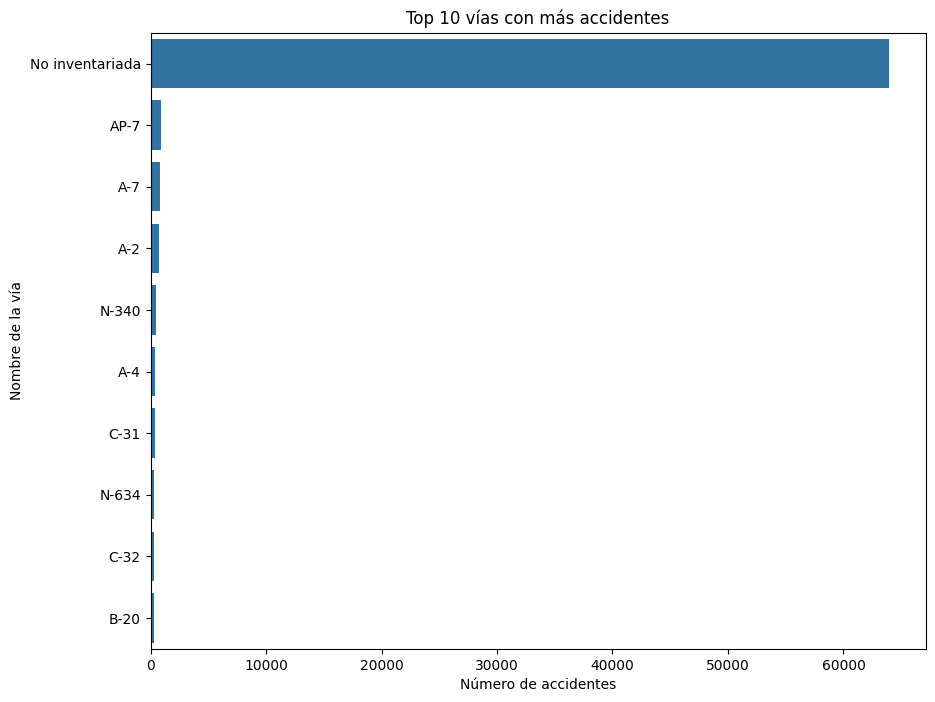

In [ ]:
# Vías con más accidentes
plt.figure(figsize=(10, 8))
sns.countplot(y='CARRETERA', data=df_tads, order=df_tads['CARRETERA'].value_counts().nlargest(10).index)
plt.title('Top 10 vías con más accidentes')
plt.xlabel('Número de accidentes')
plt.ylabel('Nombre de la vía')
plt.show()
#Terrible gesti'on de la DGT

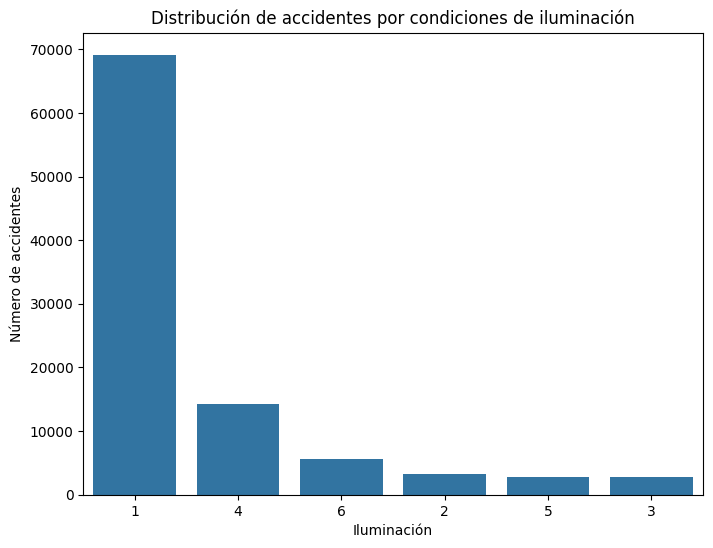

In [ ]:
# Distribución de accidentes según la iluminación
plt.figure(figsize=(8, 6))
sns.countplot(x='CONDICION_ILUMINACION', data=df_tads, order=df_tads['CONDICION_ILUMINACION'].value_counts().index)
plt.title('Distribución de accidentes por condiciones de iluminación')
plt.xlabel('Iluminación')
plt.ylabel('Número de accidentes')
plt.show()
# 1: Luz del día natural, solar; 2: Amanecer o atardecer, sin luz artificial; 3: Amanecer o atardecer, con luz artificial; 4: Sin luz natural y con iluminación artificial encendida; 5: Sin luz natural y con iluminación artificial no encendida; 6: Sin luz natural ni artificial

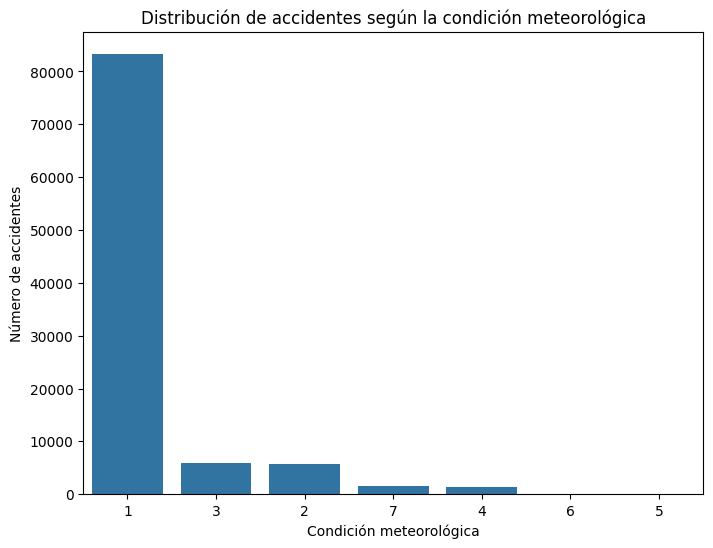

In [ ]:
# Distribución de accidentes según las condiciones meteorológicas
plt.figure(figsize=(8, 6))
sns.countplot(x='CONDICION_METEO', data=df_tads, order=df_tads['CONDICION_METEO'].value_counts().index)
plt.title('Distribución de accidentes según la condición meteorológica')
plt.xlabel('Condición meteorológica')
plt.ylabel('Número de accidentes')
plt.show()
#1: Despejado, 2: Nublado , 3: Lluvia débil

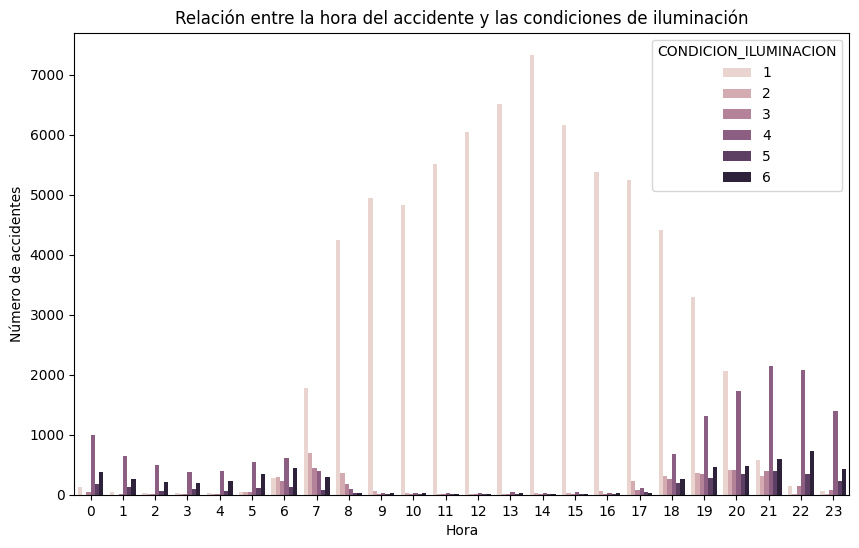

In [ ]:
# Relación entre la hora del accidente y las condiciones de iluminación
plt.figure(figsize=(10, 6))
sns.countplot(x='HORA', hue='CONDICION_ILUMINACION', data=df_tads)
plt.title('Relación entre la hora del accidente y las condiciones de iluminación')
plt.xlabel('Hora')
plt.ylabel('Número de accidentes')
plt.show()


In [ ]:
# Agrupamos por provincia y vía para encontrar los puntos críticos
df_critical = df_tads.groupby(['COD_PROVINCIA', 'CARRETERA']).size().reset_index(name='TIPO_ACCIDENTE').sort_values(by='TIPO_ACCIDENTE', ascending=False)

# Mostramos las 10 combinaciones más peligrosas
df_critical.head(10)

#Lo cual gracias a la mala recolecta de data de la DGT vemos que no tiene sentido ya que las carreteras "No inventariadas" ocupan la mayoría

,COD_PROVINCIA,CARRETERA,TIPO_ACCIDENTE
1097,8,No inventariada,12407
3359,28,No inventariada,12162
3470,29,No inventariada,4027
5578,46,No inventariada,3447
4918,41,No inventariada,3029
3526,30,No inventariada,2540
333,3,No inventariada,2082
1411,11,No inventariada,1997
825,7,No inventariada,1964
4248,35,No inventariada,1176


#Especificaciones de vehículos

In [ ]:
file_vhc = pd.read_excel('/content/drive/MyDrive/Proyecto mejor ruta DS/Especificaciones de vehículos hybrid de Amazon.xlsx')
df_vhc = pd.DataFrame(file_vhc)

In [ ]:
df_vhc.describe()

,Capacidad de carga,Volumen de carga medio,Potencia CV,Bateria kWh,Autonomía,Diesel/100km,kWh/100km,precio
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1443.333333,13.666667,153.000000,55.666667,222.333333,70.333333,30.666667,35666.666667
std,75.055535,3.055050,102.239914,10.969655,85.710754,0.577350,4.041452,4041.451884
min,1400.000000,11.000000,76.000000,47.000000,150.000000,70.000000,27.000000,32000.000000
25%,1400.000000,12.000000,95.000000,49.500000,175.000000,70.000000,28.500000,33500.000000
50%,1400.000000,13.000000,114.000000,52.000000,200.000000,70.000000,30.000000,35000.000000
75%,1465.000000,15.000000,191.500000,60.000000,258.500000,70.500000,32.500000,37500.000000
max,1530.000000,17.000000,269.000000,68.000000,317.000000,71.000000,35.000000,40000.000000


#TRÁFICO

*   Mapas de tráfico del 2021



In [ ]:
!pip install contextily


In [86]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import MultiLineString, LineString

ruta_tramos = '/content/drive/MyDrive/Proyecto mejor ruta DS/Trafico/DGC_trafico/Tramos2021.shp'
tramos = gpd.read_file(ruta_tramos)

ruta_estaciones = '/content/drive/MyDrive/Proyecto mejor ruta DS/Trafico/DGC_trafico/Estaciones2021.shp'
estaciones = gpd.read_file(ruta_estaciones)


In [ ]:

# Verificar el sistema de coordenadas original (CRS) de los datos
print("CRS original de tramos:", tramos.crs)
print("CRS original de estaciones:", estaciones.crs)

# Transformar ambos a EPSG:4326 (Latitud/Longitud) si no están en ese CRS ya que es el que utiliza folium
if tramos.crs != 'EPSG:4326':
    tramos = tramos.to_crs('EPSG:4326')
if estaciones.crs != 'EPSG:4326':
    estaciones = estaciones.to_crs('EPSG:4326')

# Obtener el centro del mapa para centrarlo en las coordenadas promedio de los datos
centro_mapa = [estaciones.geometry.y.mean(), estaciones.geometry.x.mean()]

# Crear un mapa centrado en la ubicación de las estaciones o tramos
m = folium.Map(location=centro_mapa, zoom_start=12)

# Añadir los tramos (líneas) al mapa, incluyendo MultiLineString
for _, row in tramos.iterrows():
    geom = row.geometry

    # Si la geometría es un MultiLineString, iteramos sobre cada LineString dentro de ella
    if isinstance(geom, MultiLineString):
        for line in geom.geoms:  # Usar geom.geoms para acceder a cada LineString
            folium.PolyLine(locations=[(point[1], point[0]) for point in line.coords],
                            color="blue", weight=2).add_to(m)

    # Si la geometría es un LineString simple
    elif isinstance(geom, LineString):
        folium.PolyLine(locations=[(point[1], point[0]) for point in geom.coords],
                        color="blue", weight=2).add_to(m)

# Crear un cluster para agrupar las estaciones
marker_cluster = MarkerCluster().add_to(m)

# Añadir las estaciones (puntos) al mapa con marcador interactivo
for _, row in estaciones.iterrows():
    folium.Marker(location=[row.geometry.y, row.geometry.x],
                  popup=f"Estación: {row.get('nombre', 'Sin nombre')}").add_to(marker_cluster)

# Guardar el mapa como archivo HTML
m.save("mapa_tramos_estaciones.html")

# Mostrar el mapa en Jupyter Notebook (si estás en un entorno compatible)
m

In [ ]:
if tramos.crs != 'EPSG:3857':  # Web Mercator (proyección métrica)
    tramos_metrico = tramos.to_crs('EPSG:3857')
else:
    tramos_metrico = tramos

# Calcular la longitud de cada tramo en kilómetros
tramos_metrico['longitud_km'] = tramos_metrico.geometry.length / 1000

# Longitud de los 5 primeros tramos
print("Longitud de los primeros 5 tramos (km):")
print(tramos_metrico[['longitud_km']].head())

# 2. Atributos de los tramos
# Ver qué columnas/atributos están disponibles para explorar más información
print("\nAtributos disponibles en tramos:")
print(tramos.columns)

# 3. Atributos de las estaciones
print("\nAtributos disponibles en estaciones:")
print(estaciones.columns)

# 4. Datos relevantes de las estaciones (mostrar los primeros 5 registros)
print("\nDatos de las primeras 5 estaciones:")
print(estaciones.head())

Longitud de los primeros 5 tramos (km):
   longitud_km
0     7.142401
1     7.769471
2    17.041293
3     2.634717
4     7.366094

Atributos disponibles en tramos:
Index(['uuid_traf', 'carretera', 'tipo', 'provincia', 'pk_inicio', 'pk_fin',
       'longitud', 'vhkmtotal', 'vhkmligero', 'vhkmpesado', 'imd_total',
       'imd_ligero', 'imd_pesado', 'geometry'],
      dtype='object')

Atributos disponibles en estaciones:
Index(['estación', 'tipo', 'carretera', 'pk', 'provincia', 'población',
       'n_calzadas', 'configurac', 'imd_total', 'imd_ligero', 'imd_pesado',
       'porc_vp', 'días_afor', 'geometry'],
      dtype='object')

Datos de las primeras 5 estaciones:
   estación   tipo carretera    pk    provincia         población  n_calzadas  \
0  VI-502-4  Peaje     AP-68  25.5  Araba/Álava         ARETA SUR           2   
1  VI-503-4  Peaje     AP-68  32.0  Araba/Álava          CIORROGA           2   
2  VI-504-4  Peaje     AP-68  45.0  Araba/Álava            ALTUBE           2   
3  

In [ ]:
# Ordenar los tramos por el tráfico total (vhkmtotal) y mostrar el top 10 con mayor tráfico
top_tramos_trafico_total = tramos.sort_values(by='vhkmtotal', ascending=False).head(10)
print("Tramos con mayor tráfico total (vehículos por km):")
print(top_tramos_trafico_total[['carretera', 'vhkmtotal', 'vhkmpesado', 'longitud']])

# Calcular el porcentaje de tráfico pesado sobre el total
tramos['porc_trafico_pesado'] = (tramos['vhkmpesado'] / tramos['vhkmtotal']) * 100

# Mostrar el top 10 tramos con mayor porcentaje de tráfico pesado
top_tramos_trafico_pesado = tramos.sort_values(by='porc_trafico_pesado', ascending=False).head(10)
print("\nTramos con mayor porcentaje de tráfico pesado:")
print(top_tramos_trafico_pesado[['carretera', 'vhkmtotal', 'vhkmpesado', 'porc_trafico_pesado']])

Tramos con mayor tráfico total (vehículos por km):
     carretera    vhkmtotal   vhkmpesado  longitud
687        A-7  440494758.0  104699936.0     10.15
2051       A-2  380483892.0   35598597.0      8.80
1865       A-6  351024335.0   25429791.0      6.94
916        A-7  342794476.0   73969859.0     11.27
564        A-4  332048666.0   54679439.0      7.88
475       AP-7  323588593.0   73566843.0     16.06
1315      AP-7  321821602.0   27935865.0      9.98
1070       A-2  310709983.0   38002268.0      5.80
258       AP-7  305832667.0   64264566.0     13.43
287       M-40  303215402.0   13906244.0      7.45

Tramos con mayor porcentaje de tráfico pesado:
     carretera   vhkmtotal  vhkmpesado  porc_trafico_pesado
3884    N-620A   1817744.0   1659232.0            91.279740
3846    N-620R    881811.0    804577.0            91.241434
3770    N-620R    297132.0    271107.0            91.241267
2787       N-2  47742756.0  31979640.0            66.983230
4292      N-2A     55246.0     34843.0  

In [ ]:
# Ordenar las estaciones por imd_total y mostrar las 10 con mayor tráfico total
top_estaciones_trafico_total = estaciones.sort_values(by='imd_total', ascending=False).head(10)
print("\nEstaciones con mayor tráfico total (IMD total):")
print(top_estaciones_trafico_total[['estación', 'carretera', 'imd_total', 'imd_pesado', 'n_calzadas']])

# Calcular el porcentaje de tráfico pesado sobre el total en las estaciones
estaciones['porc_trafico_pesado'] = (estaciones['imd_pesado'] / estaciones['imd_total']) * 100

# Mostrar las 10 estaciones con mayor porcentaje de tráfico pesado
top_estaciones_trafico_pesado = estaciones.sort_values(by='porc_trafico_pesado', ascending=False).head(10)
print("\nEstaciones con mayor porcentaje de tráfico pesado:")
print(top_estaciones_trafico_pesado[['estación', 'carretera', 'imd_total', 'imd_pesado', 'porc_trafico_pesado']])


Estaciones con mayor tráfico total (IMD total):
      estación carretera  imd_total  imd_pesado  n_calzadas
2014   M-115-0      M-40   184006.0      6856.0           2
2016   M-114-0      M-40   166606.0      8424.0           2
2010   M-112-0      M-40   165903.0     12078.0           2
3393    M-86-0       A-2   159154.0     21568.0           2
2007   M-139-0       A-3   155711.0      6917.0           2
2060   M-270-0       A-1   145984.0      4926.0           2
2885   M-990-0       A-4   142899.0     21669.0           2
3332   V-305-2      V-30   142537.0     13236.0           2
2081   M-113-0      M-40   141772.0      6787.0           2
2051  MA-374-0     MA-20   139385.0      4061.0           2

Estaciones con mayor porcentaje de tráfico pesado:
      estación carretera  imd_total  imd_pesado  porc_trafico_pesado
249   BU-310-3    N-620A      883.0       806.0            91.279728
1827  SA-392-0    N-620r     2626.0      2396.0            91.241432
1453    Z-18-0       N-2     494

#PUNTOS DE REPOSTAJE

In [2]:
gasocsv = pd.read_csv('/content/drive/MyDrive/Proyecto mejor ruta DS/gasolineras_global.csv')
electcsv = pd.read_csv('/content/drive/MyDrive/Proyecto mejor ruta DS/electrolineras_global.csv')

df_gas = pd.DataFrame(gasocsv)
df_elect = pd.DataFrame(electcsv)

In [6]:
print(df_gas.shape)
print(df_gas.columns)
print(df_elect.shape)
print(df_elect.columns)

(10564, 13)
Index(['Provincia', 'Municipio', 'Localidad', 'Código postal', 'Dirección',
       'Margen', 'Toma de datos', 'Precio', 'Rótulo', 'Tipo venta', 'Rem.',
       'Horario', 'Tipo servicio'],
      dtype='object')
(6929, 6)
Index(['Provincia', 'Localidad', 'Direccion', 'Referencia', 'Empresa',
       'Atencion'],
      dtype='object')


In [16]:
df_gas.head()

,Provincia,Municipio,Localidad,Código postal,Dirección,Margen,Toma de datos,Precio,Rótulo,Tipo venta,Rem.,Horario,Tipo servicio
0,ALBACETE,ALBACETE,ALBACETE,02007,"AVENIDA PRIMERA, S/N",D,26/08/2024 18:28,"1,389",GMOIL,P,dm,L-D: 24H,L-D: 24H (A)
1,ALBACETE,ALBACETE,ALBACETE,02006,"CALLE ALCALDE CONANGLA (C.C. EROSKI), S/N",N,27/08/2024 10:56,"1,399",FAMILY ENERGY,P,dm,L-S: 07:00-23:00 D: 08:00-23:00,L-S: 07:00-23:00 (A) D: 08:00-23:00 (A)
2,ALBACETE,ALBACETE,ALBACETE,02001,"CALLE FEDERICO GARCIA LORCA, 1",D,27/08/2024 12:20,"1,399",PLENOIL,P,dm,L-D: 24H,L-D: 24H (D)
3,ALBACETE,ALBACETE,ALBACETE,02005,"AVENIDA ESCRITOR RODRIGO RUBIO, 3",D,27/08/2024 12:02,"1,399",A&A,P,dm,L-S: 09:00-21:30,L-S: 09:00-21:30 (A)
4,ALBACETE,ALBACETE,ALBACETE,02005,"CALLE CONSTANTINO ROMERO, S/N",D,27/08/2024 12:20,"1,399",PLENOIL,P,dm,L-D: 24H,L-D: 24H (D)


##GASOLINERAS

In [17]:
df_gas['Precio'] = df_gas['Precio'].str.replace(',', '').str.replace(' ', '')

In [18]:
df_gas['Precio'] = pd.to_numeric(df_gas['Precio'], errors='coerce')

In [20]:
print(df_gas['Precio'].dtype)

float64


In [39]:
df_gas['Precio'] = df_gas['Precio']/1000

In [43]:
df_gas['Provincia'].value_counts()

,count
Provincia,
MADRID,822
BARCELONA,753
VALENCIA / VALÈNCIA,591
ALICANTE,470
MURCIA,410
SEVILLA,407
MÁLAGA,304
CORUÑA (A),278
CÁDIZ,271


In [40]:
df_promedios = df_gas.groupby('Provincia').agg({
    'Precio': 'mean'}).reset_index()
top_10_provincias = df_gas['Provincia'].value_counts().nlargest(10).index
df_top10 = df_gas[df_gas['Provincia'].isin(top_10_provincias)]

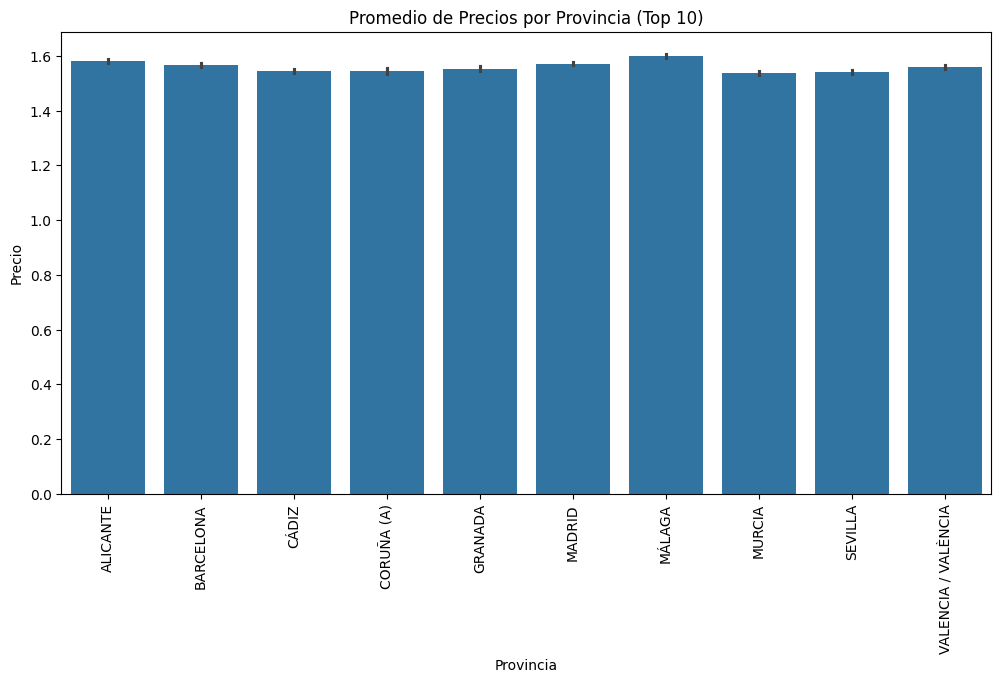

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Precio', data=df_top10)
plt.xticks(rotation=90)
plt.title('Promedio de Precios por Provincia (Top 10)')
plt.show()

##ELECTROLINERAS

In [42]:
df_elect.head()

,Provincia,Localidad,Direccion,Referencia,Empresa,Atencion
0,Alava,Vitoria - Gasteiz,"Calle De Iturritxu, 5A, 01006 Vitoria-Gasteiz",EN LA CALLE,(ZUNDER) Grupo Easychargar SA,24 horas ininterrumpido
1,Alava,Vitoria-Gasteiz,"E.Leclerc Vitoria-Gasteiz, Mahatma Gandhi Kal",EN LA CALLE,Punto Recargas SL,09:30 - 21:30
2,Alava,Ribera Baja/Erribera Beitia,"Au Ap-68 P.K. 63,50 I",APARCAMIENTO EN SUPERFICIE,REPSOL COMERCIAL DE PRODUCTOS PETROLIFEROS SA,24 horas ininterrumpido
3,Alava,Lantarón,"Au Ap-68, 63 D",APARCAMIENTO EN SUPERFICIE,REPSOL COMERCIAL DE PRODUCTOS PETROLIFEROS SA,24 horas ininterrumpido
4,Alava,VITORIA GASTEIZ,"La Peña,11",APARCAMIENTO ÁEREO,IBERDROLA CLIENTES S.A.U,24 horas ininterrumpido


In [44]:
df_elect['Provincia'].value_counts()

,count
Provincia,
Barcelona,982
Madrid,793
Alicante,411
Valencia,396
Tarragona,261
Girona,232
Asturias,231
Baleares,227
Malaga,184


#HISTÓRICO DE TIEMPOS DE ENTREGA

In [18]:
file_hte = pd.read_excel('/content/drive/MyDrive/Proyecto mejor ruta DS/Tiempos_Entrega_Sintetico_2011_2024.xlsx')
df_hte = pd.DataFrame(file_hte)

In [19]:
df_hte.head(10)

,Destino,Fecha,Tiempo de Entrega (horas),Tiempo de Entrega (minutos)
0,"40.47681, -3.37641",2011-01-31,10.232614,613.956861
1,"40.47681, -3.37641",2011-02-28,11.024943,661.496583
2,"40.47681, -3.37641",2011-03-31,10.590665,635.439927
3,"40.47681, -3.37641",2011-04-30,9.695792,581.747515
4,"40.47681, -3.37641",2011-05-31,10.503806,630.228336
5,"40.47681, -3.37641",2011-06-30,10.185830,611.149812
6,"40.47681, -3.37641",2011-07-31,11.215831,672.949858
7,"40.47681, -3.37641",2011-08-31,10.622967,637.377993
8,"40.47681, -3.37641",2011-09-30,10.581325,634.879472
9,"40.47681, -3.37641",2011-10-31,9.544679,572.680712


In [20]:
df_hte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Destino                      5544 non-null   object        
 1   Fecha                        5544 non-null   datetime64[ns]
 2   Tiempo de Entrega (horas)    5544 non-null   float64       
 3   Tiempo de Entrega (minutos)  5544 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.4+ KB


In [21]:
df_hte.describe()

,Fecha,Tiempo de Entrega (horas),Tiempo de Entrega (minutos)
count,5544,5544.000000,5544.000000
mean,2018-01-14 09:25:42.857143040,11.195236,671.714188
min,2011-01-31 00:00:00,2.832754,169.965219
25%,2014-07-23 06:00:00,7.011038,420.662310
50%,2018-01-15 12:00:00,10.556214,633.372825
75%,2021-07-07 18:00:00,14.740665,884.439895
max,2024-12-31 00:00:00,21.411721,1284.703233
std,NaN,4.585214,275.112851


In [22]:
df_hte['Año'] = df_hte['Fecha'].dt.year

In [23]:
data_grouped = df_hte.groupby('Año').agg({'Tiempo de Entrega (minutos)': 'mean', 'Tiempo de Entrega (horas)': 'mean'}).reset_index()

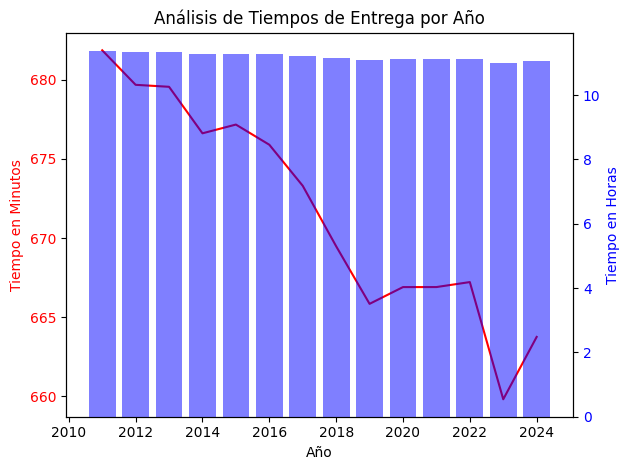

In [24]:
fig, ax1 = plt.subplots()

ax1.plot(data_grouped['Año'], data_grouped['Tiempo de Entrega (minutos)'], color='red', label='Tiempo en Minutos')
ax1.set_xlabel('Año')
ax1.set_ylabel('Tiempo en Minutos', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.bar(data_grouped['Año'], data_grouped['Tiempo de Entrega (horas)'], color='blue', alpha=0.5, label='Tiempo en Horas')
ax2.set_ylabel('Tiempo en Horas', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Análisis de Tiempos de Entrega por Año')
fig.tight_layout()
plt.show()

In [25]:
#VAMOS A FILTRAR EL DF PARA EL MACHINE LEARNING POR LOS 10 DESTINOS MAS RELAVNTES SEGUN MI CRITERIO
print(df_hte['Destino'].head())

0    40.47681, -3.37641
1    40.47681, -3.37641
2    40.47681, -3.37641
3    40.47681, -3.37641
4    40.47681, -3.37641
Name: Destino, dtype: object


In [26]:
df_hte['Destino'] = df_hte['Destino'].apply(lambda x: tuple(map(float, x.split(', '))) if isinstance(x, str) else x)

In [27]:
coordenadas_interes = [
    (40.47681, -3.37641),  # Alcala de Henares (Madrid)
    (38.39507, -0.52484),  # San Vicente del Raspeig (Alicante)
    (40.53734, -3.66367),  # Alcobendas (Madrid)
    (41.52133, 2.12948),   # Barbera (Barcelona)
    (41.43048, 2.20458),   # San Andres de Palomar (Barcelona)
    (41.47255, 1.97913),   # Castellbisbal (Barcelona)
    (40.43391, -3.55228),  # San Fernando de Henares (Madrid)
    (37.28995, -5.94241),  # Dos Hermanas (Sevilla)
    (41.31206, 2.07286),   # El Prat de Llobregat (Barcelona)
    (36.61346, -6.19240)   # El Puerto de Santa Maria (Cadiz)
]

data = df_hte[df_hte['Destino'].isin(coordenadas_interes)]
print(data)

                   Destino      Fecha  Tiempo de Entrega (horas)  \
0     (40.47681, -3.37641) 2011-01-31                  10.232614   
1     (40.47681, -3.37641) 2011-02-28                  11.024943   
2     (40.47681, -3.37641) 2011-03-31                  10.590665   
3     (40.47681, -3.37641) 2011-04-30                   9.695792   
4     (40.47681, -3.37641) 2011-05-31                  10.503806   
...                    ...        ...                        ...   
1675   (36.61346, -6.1924) 2024-08-31                  11.030150   
1676   (36.61346, -6.1924) 2024-09-30                  11.533755   
1677   (36.61346, -6.1924) 2024-10-31                  12.049434   
1678   (36.61346, -6.1924) 2024-11-30                  11.542989   
1679   (36.61346, -6.1924) 2024-12-31                  12.324369   

      Tiempo de Entrega (minutos)   Año  
0                      613.956861  2011  
1                      661.496583  2011  
2                      635.439927  2011  
3              

In [33]:
ubicaciones = {
    (40.47681, -3.37641): ("Alcala de Henares", "Madrid"),
    (38.39507, -0.52484): ("San Vicente del Raspeig", "Alicante"),
    (40.53734, -3.66367): ("Alcobendas", "Madrid"),
    (41.52133, 2.12948): ("Barbera", "Barcelona"),
    (41.43048, 2.20458): ("San Andres de Palomar", "Barcelona"),
    (41.47255, 1.97913): ("Castellbisbal", "Barcelona"),
    (40.43391, -3.55228): ("San Fernando de Henares", "Madrid"),
    (37.28995, -5.94241): ("Dos Hermanas", "Sevilla"),
    (41.31206, 2.07286): ("El Prat de Llobregat", "Barcelona"),
    (36.61346, -6.19240): ("El Puerto de Santa Maria", "Cadiz")
}

In [34]:
df_ubicaciones = pd.DataFrame.from_dict(ubicaciones, orient='index', columns=['ubicacion', 'provincia']).reset_index()

# Renombrar la columna 'index' a 'coordenadas'
df_ubicaciones = df_ubicaciones.rename(columns={'index': 'coordenadas'})

In [43]:
latitudes_ubicaciones = {
    "Alcala de Henares": 40.47681,
    "San Vicente del Raspeig": 38.39507,
    "Alcobendas": 40.53734,
    "Barbera": 41.52133,
    "San Andres de Palomar": 41.43048,
    "Castellbisbal": 41.47255,
    "San Fernando de Henares": 40.43391,
    "Dos Hermanas": 37.28995,
    "El Prat de Llobregat": 41.31206,
    "El Puerto de Santa Maria": 36.61346
}

In [44]:
df_ubicaciones['latitud'] = df_ubicaciones['ubicacion'].map(latitudes_ubicaciones)

print(df_ubicaciones)

            coordenadas                 ubicacion  provincia   latitud
0  (40.47681, -3.37641)         Alcala de Henares     Madrid  40.47681
1  (38.39507, -0.52484)   San Vicente del Raspeig   Alicante  38.39507
2  (40.53734, -3.66367)                Alcobendas     Madrid  40.53734
3   (41.52133, 2.12948)                   Barbera  Barcelona  41.52133
4   (41.43048, 2.20458)     San Andres de Palomar  Barcelona  41.43048
5   (41.47255, 1.97913)             Castellbisbal  Barcelona  41.47255
6  (40.43391, -3.55228)   San Fernando de Henares     Madrid  40.43391
7  (37.28995, -5.94241)              Dos Hermanas    Sevilla  37.28995
8   (41.31206, 2.07286)      El Prat de Llobregat  Barcelona  41.31206
9   (36.61346, -6.1924)  El Puerto de Santa Maria      Cadiz  36.61346


In [46]:
data['latitud'] = data['Destino'].apply(lambda x: x[0] if isinstance(x, tuple) else None)

<ipython-input-46-1d5ef9323976>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['latitud'] = data['Destino'].apply(lambda x: x[0] if isinstance(x, tuple) else None)


In [47]:
df_combinado = pd.merge(data, df_ubicaciones, on='latitud', how='left')

In [48]:
print(df_combinado)

                   Destino      Fecha  Tiempo de Entrega (horas)  \
0     (40.47681, -3.37641) 2011-01-31                  10.232614   
1     (40.47681, -3.37641) 2011-02-28                  11.024943   
2     (40.47681, -3.37641) 2011-03-31                  10.590665   
3     (40.47681, -3.37641) 2011-04-30                   9.695792   
4     (40.47681, -3.37641) 2011-05-31                  10.503806   
...                    ...        ...                        ...   
1675   (36.61346, -6.1924) 2024-08-31                  11.030150   
1676   (36.61346, -6.1924) 2024-09-30                  11.533755   
1677   (36.61346, -6.1924) 2024-10-31                  12.049434   
1678   (36.61346, -6.1924) 2024-11-30                  11.542989   
1679   (36.61346, -6.1924) 2024-12-31                  12.324369   

      Tiempo de Entrega (minutos)   Año   latitud           coordenadas  \
0                      613.956861  2011  40.47681  (40.47681, -3.37641)   
1                      661.496583

#MACHINE LEARNING PREDICCION DE TIEMPOS DE ENTREGA
Ahora para vamos a agregar el resto de variables climatologicas y de trafico y accidentes pal dataframe combinado

In [66]:
df_combinado['provincia'] = df_combinado['provincia'].str.strip().str.lower()
df_met['Localidad'] = df_met['Localidad'].str.strip().str.lower()

In [67]:
localidades_df_combinado = df_combinado['provincia'].unique()
print("Localidades en df_combinado:", localidades_df_combinado)

Localidades en df_combinado: ['madrid' 'alicante' 'barcelona' 'sevilla' 'cadiz']


In [68]:
df_met_grouped = df_met.groupby('Localidad').agg({
    'Temperatura Máxima (C)': 'mean',
    'Temperatura Mínima (C)': 'mean',
    'Precipitación (mm)': 'mean',
    'Condición del Clima': lambda x: x.mode()[0] if not x.mode().empty else None  # Condición más frecuente
}).reset_index()

In [71]:
df_dhmet = pd.merge(df_combinado, df_met_grouped, left_on='provincia', right_on='Localidad', how='left')

In [73]:
df_dhmet = df_dhmet.drop(columns=['Destino'])

In [74]:
df_dhmet.head()

,Fecha,Tiempo de Entrega (horas),Tiempo de Entrega (minutos),Año,latitud,coordenadas,ubicacion,provincia,Localidad,Temperatura Máxima (C),Temperatura Mínima (C),Precipitación (mm),Condición del Clima
0,2011-01-31,10.232614,613.956861,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular
1,2011-02-28,11.024943,661.496583,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular
2,2011-03-31,10.590665,635.439927,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular
3,2011-04-30,9.695792,581.747515,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular
4,2011-05-31,10.503806,630.228336,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular


In [81]:
df_acp_grouped = df_acp.groupby('provincia')['numero'].mean().reset_index()

In [82]:
df_acp_grouped['provincia'] = df_acp_grouped['provincia'].str.strip().str.lower()

In [83]:
df_final = pd.merge(df_dhmet, df_acp_grouped, on='provincia', how='left')

In [84]:
df_final = df_final.rename(columns={'numero': 'media_numero'})

In [87]:
# Reemplazar todos los valores NaN por 0 en df_final
df_final = df_final.fillna(0)

In [90]:
df_final = df_final.drop(columns=['Tiempo de Entrega (minutos)'])

In [97]:
df_final = df_final.drop(columns=['Fecha'])

In [98]:
df_final

,Tiempo de Entrega (horas),Año,latitud,coordenadas,ubicacion,provincia,Localidad,Temperatura Máxima (C),Temperatura Mínima (C),Precipitación (mm),Condición del Clima,media_numero
0,10.232614,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular,103.927062
1,11.024943,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular,103.927062
2,10.590665,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular,103.927062
3,9.695792,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular,103.927062
4,10.503806,2011,40.47681,"(40.47681, -3.37641)",alcala de henares,madrid,madrid,20.290625,12.503125,2.319167,Posible lluvia irregular,103.927062
...,...,...,...,...,...,...,...,...,...,...,...,...
1675,11.030150,2024,36.61346,"(36.61346, -6.1924)",el puerto de santa maria,cadiz,0,0.000000,0.000000,0.000000,0,0.000000
1676,11.533755,2024,36.61346,"(36.61346, -6.1924)",el puerto de santa maria,cadiz,0,0.000000,0.000000,0.000000,0,0.000000
1677,12.049434,2024,36.61346,"(36.61346, -6.1924)",el puerto de santa maria,cadiz,0,0.000000,0.000000,0.000000,0,0.000000
1678,11.542989,2024,36.61346,"(36.61346, -6.1924)",el puerto de santa maria,cadiz,0,0.000000,0.000000,0.000000,0,0.000000


## Selección del modelo

RandomForest para Regresión porque es mas flexible a la hora de trabajar con datos heterogéneos como variables categóricas que son bastantes y numéricas. Es robusto ante valores atipicos y debido a la cantidad de información faltante que tenemos los resultados nos serán de prueba mas posiblemente no podamos fiarnos del todo.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
X = df_final.drop(columns=['Tiempo de Entrega (horas)'])

y = df_final['Tiempo de Entrega (horas)']

In [108]:
print(X.dtypes)

Año                         int32
latitud                   float64
coordenadas                object
ubicacion                  object
provincia                  object
Localidad                  object
Temperatura Máxima (C)    float64
Temperatura Mínima (C)    float64
Precipitación (mm)        float64
Condición del Clima        object
media_numero              float64
dtype: object


In [109]:
X = pd.get_dummies(X, drop_first=True)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [113]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [114]:
y_pred = rf_model.predict(X_test)

In [116]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.4772999538132828
R² Score: 0.9528652931467234
